In [1]:
import sys
# If you want to re-run, just modify this to where you put the NS_NFMC fork of the PyMC3 repo.
sys.path.insert(1, '/home/richard/pymc3_dev/')
import arviz as az
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from pymc3.theanof import inputvars
import theano
import theano.tensor as tt
import seaborn as sns
import pandas as pd

print(f"Running on PyMC3 v{pm.__version__}")

az.style.use("arviz-darkgrid")

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Running on PyMC3 v3.11.0


In [40]:
n = 4

mu1 = np.ones(n) * (1.0 / 2)
mu2 = -mu1

stdev = 0.1
sigma = np.power(stdev, 2) * np.eye(n)
isigma = np.linalg.inv(sigma)
dsigma = np.linalg.det(sigma)

w1 = 0.3  # one mode with 0.3 of the mass 
w2 = 1 - w1  # the other mode with 0.7 of the mass

def two_gaussians(x):
    log_like1 = (
        -0.5 * n * tt.log(2 * np.pi)
        - 0.5 * tt.log(dsigma)
        - 0.5 * (x - mu1).T.dot(isigma).dot(x - mu1)
    )
    log_like2 = (
        -0.5 * n * tt.log(2 * np.pi)
        - 0.5 * tt.log(dsigma)
        - 0.5 * (x - mu2).T.dot(isigma).dot(x - mu2)
    )
    return pm.math.logsumexp([tt.log(w1) + log_like1, tt.log(w2) + log_like2])

with pm.Model() as model:
    X = pm.Uniform(
        "X",
        shape=n,
        lower=-2.0 * np.ones_like(mu1),
        upper=2.0 * np.ones_like(mu1),
        testval=-1.0 * np.ones_like(mu1),
    )
    #X = pm.Normal('X', mu=0, sigma=1, shape=n)
    
    llk = pm.Potential("llk", two_gaussians(X))
    
    smc_trace = pm.sample_smc(1000)
    init_samples = smc_trace.get_values('X')
    print(np.shape(init_samples))
    
with model:
    
    trace = pm.sample_nfmc(2000, init_samples=None, nf_iter=40, chains=1, init_method='prior', 
                           local_thresh=4, local_step_size=2.0, local_grad=True, init_local=True, 
                           full_local=True, nf_local_iter=0, frac_validate=0.2, alpha=(0.0,0.0), 
                           parallel=False, NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True,
                           iteration=5)
    az_trace = az.from_pymc3(trace)

Initializing SMC sampler...
INFO:pymc3:Initializing SMC sampler...
Sampling 2 chains in 0 job
INFO:pymc3:Sampling 2 chains in 0 job
/home/richard/pymc3_dev/pymc3/sampling.py:1924: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
Stage:   0 Beta: 0.010
INFO:pymc3:Stage:   0 Beta: 0.010
Stage:   1 Beta: 0.029
INFO:pymc3:Stage:   1 Beta: 0.029
Stage:   2 Beta: 0.069
INFO:pymc3:Stage:   2 Beta: 0.069
Stage:   3 Beta: 0.150
INFO:pymc3:Stage:   3 Beta: 0.150
Stage:   4 Beta: 0.325
INFO:pymc3:Stage:   4 Beta: 0.325
Stage:   5 Beta: 0.688
INFO:pymc3:Stage:   5 Beta: 0.688
Stage:   6 Beta: 1.000
INFO:pymc3:Stage:   6 Beta: 1.000
/home/richard/pymc3_dev/pymc3/sampling.py:1924: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
Stage

(2000, 4)


/home/richard/pymc3_dev/pymc3/sampling.py:1924: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(


Number of points we perform additional local exploration around = 8


Stage:   1, Normalizing Constant Estimate: 0.0004664584522230706
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.0004664584522230706


Using local exploration at every iteration except the final one (where IW exceed the local threshold).
Number of points we perform additional local exploration around = 17


Stage:   2, Normalizing Constant Estimate: 0.003192599610754832
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.003192599610754832


Number of points we perform additional local exploration around = 62


Stage:   3, Normalizing Constant Estimate: 0.002208712298589214
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.002208712298589214


Number of points we perform additional local exploration around = 50


Stage:   4, Normalizing Constant Estimate: 0.0030542902551658167
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 0.0030542902551658167


Number of points we perform additional local exploration around = 60


Stage:   5, Normalizing Constant Estimate: 0.004285664710051021
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 0.004285664710051021


Number of points we perform additional local exploration around = 105


Stage:   6, Normalizing Constant Estimate: 0.0035680800082231465
INFO:pymc3:Stage:   6, Normalizing Constant Estimate: 0.0035680800082231465


Number of points we perform additional local exploration around = 103


Stage:   7, Normalizing Constant Estimate: 0.004140357452125423
INFO:pymc3:Stage:   7, Normalizing Constant Estimate: 0.004140357452125423


Number of points we perform additional local exploration around = 106


Stage:   8, Normalizing Constant Estimate: 0.003996039360561732
INFO:pymc3:Stage:   8, Normalizing Constant Estimate: 0.003996039360561732


Number of points we perform additional local exploration around = 111


Stage:   9, Normalizing Constant Estimate: 0.0039539221206414035
INFO:pymc3:Stage:   9, Normalizing Constant Estimate: 0.0039539221206414035


Number of points we perform additional local exploration around = 101


Stage:  10, Normalizing Constant Estimate: 0.004305776509710572
INFO:pymc3:Stage:  10, Normalizing Constant Estimate: 0.004305776509710572


Number of points we perform additional local exploration around = 80


Stage:  11, Normalizing Constant Estimate: 0.0038514359386151737
INFO:pymc3:Stage:  11, Normalizing Constant Estimate: 0.0038514359386151737


Number of points we perform additional local exploration around = 60


Stage:  12, Normalizing Constant Estimate: 0.0036848257869881583
INFO:pymc3:Stage:  12, Normalizing Constant Estimate: 0.0036848257869881583


Number of points we perform additional local exploration around = 28


Stage:  13, Normalizing Constant Estimate: 0.003826039695899598
INFO:pymc3:Stage:  13, Normalizing Constant Estimate: 0.003826039695899598


Number of points we perform additional local exploration around = 46


Stage:  14, Normalizing Constant Estimate: 0.003680531072913501
INFO:pymc3:Stage:  14, Normalizing Constant Estimate: 0.003680531072913501


Number of points we perform additional local exploration around = 31


Stage:  15, Normalizing Constant Estimate: 0.004086077184359715
INFO:pymc3:Stage:  15, Normalizing Constant Estimate: 0.004086077184359715


Number of points we perform additional local exploration around = 13


Stage:  16, Normalizing Constant Estimate: 0.003702605169227655
INFO:pymc3:Stage:  16, Normalizing Constant Estimate: 0.003702605169227655


Number of points we perform additional local exploration around = 15


Stage:  17, Normalizing Constant Estimate: 0.004013534453620627
INFO:pymc3:Stage:  17, Normalizing Constant Estimate: 0.004013534453620627


Number of points we perform additional local exploration around = 11


Stage:  18, Normalizing Constant Estimate: 0.0038669214918252825
INFO:pymc3:Stage:  18, Normalizing Constant Estimate: 0.0038669214918252825


Number of points we perform additional local exploration around = 5
Stage:  19, Normalizing Constant Estimate: 0.0038416233284229682
Normalizing constant estimate has stabilised - ending NF fits.
Performing final NF fit without local exploration.


In [41]:
nf_evidence = trace.report.evidence
print(f'NFMC calculated evidence = {nf_evidence[0]}')
weighted_samples = trace.report.weighted_samples[0]
q0_samples = weighted_samples[:2000, ...]
importance_weights = trace.report.importance_weights
q0_weights = importance_weights[0][:2000]
az_summary = az.summary(az_trace)
print(az_summary)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


NFMC calculated evidence = 0.004127122021768199
       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
X[0] -0.187  0.474  -0.649    0.635       0.01    0.008    2127.0  1886.0   
X[1] -0.188  0.474  -0.695    0.595       0.01    0.007    2073.0  2065.0   
X[2] -0.182  0.477  -0.657    0.620       0.01    0.007    2093.0  2077.0   
X[3] -0.191  0.474  -0.688    0.608       0.01    0.008    2099.0  1994.0   

      ess_bulk  ess_tail  r_hat  
X[0]    2159.0    1939.0    NaN  
X[1]    1960.0    1879.0    NaN  
X[2]    2051.0    1968.0    NaN  
X[3]    1941.0    1820.0    NaN  


<Figure size 720x480 with 0 Axes>

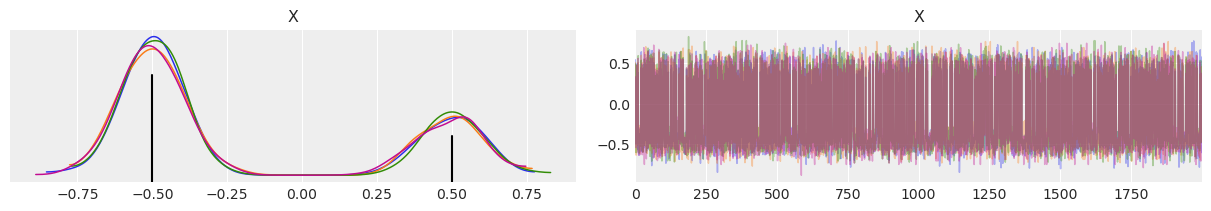

In [42]:
plt.figure()
ax = az.plot_trace(az_trace, compact=True)
for i in range(len(ax)):
    ax[i, 0].axvline(-0.5, 0, 0.7, color='k')
    ax[i, 0].axvline(0.5, 0, 0.3, color='k')
plt.show()

<Figure size 720x480 with 0 Axes>

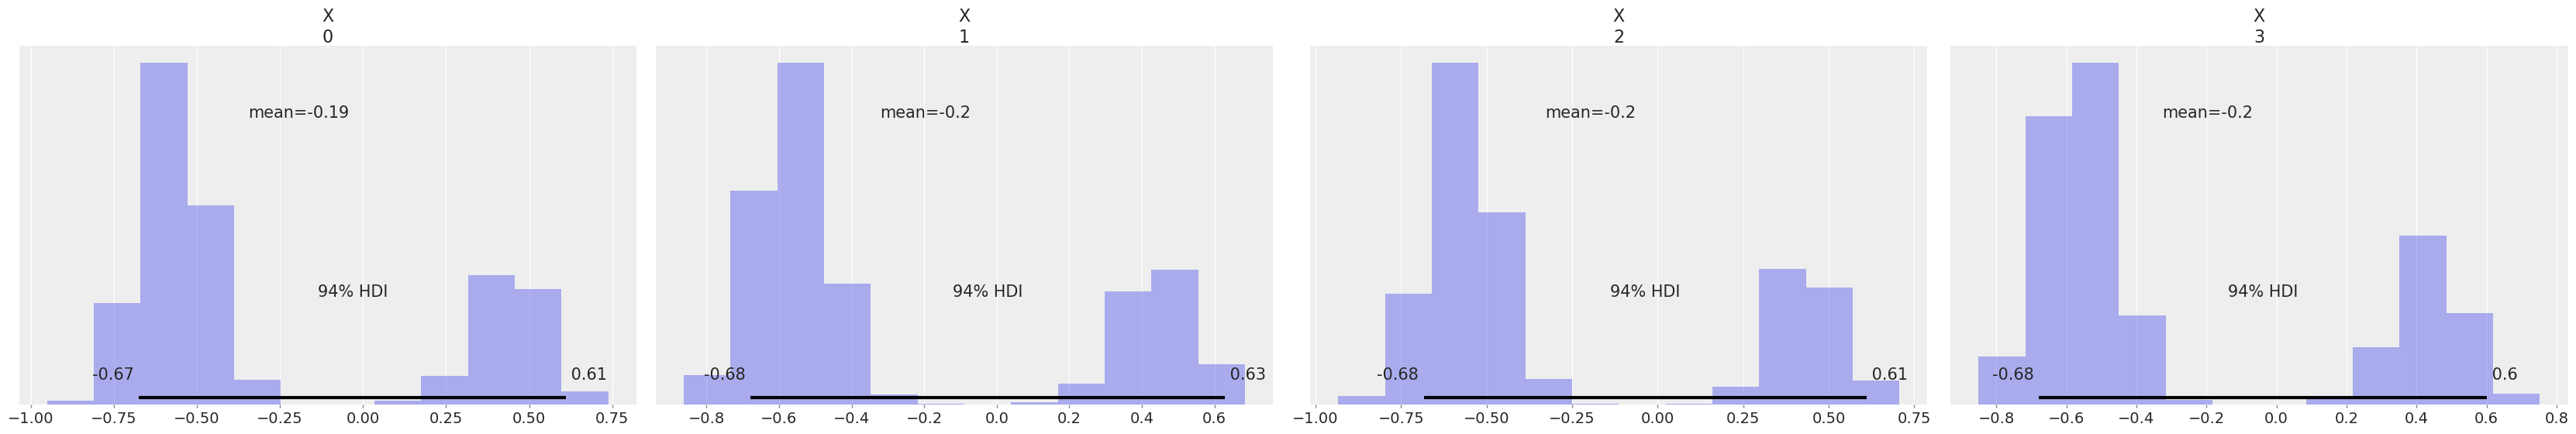

In [69]:
plt.figure()
az.plot_posterior(az_trace, kind='hist')
plt.show()

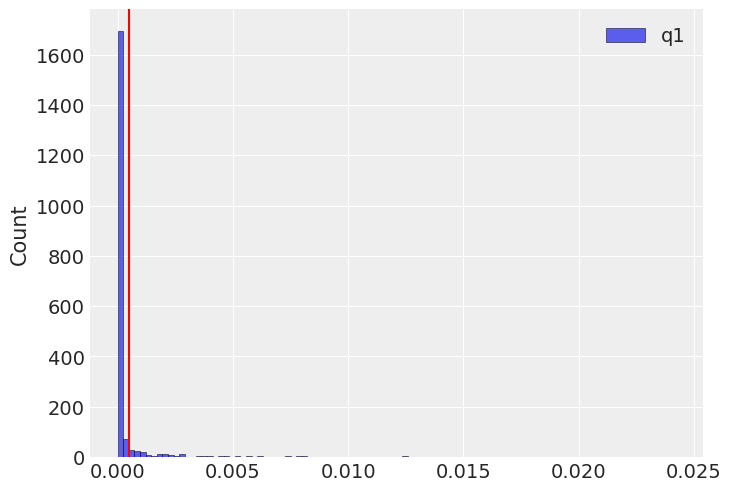

28000


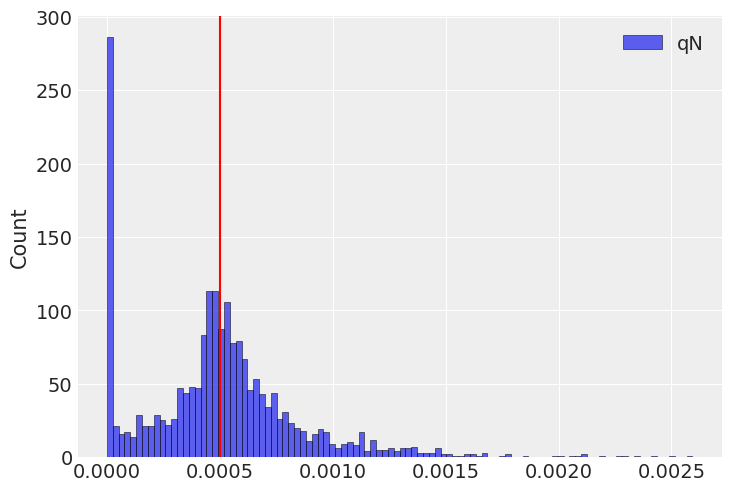

In [70]:
plt.figure()
sns.histplot(importance_weights[0][:2000], bins=100, label='q1')
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()

print(len(importance_weights[0]))

plt.figure()
sns.histplot(importance_weights[0][int(len(importance_weights[0]) - 2000):], bins=100, label='qN')
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()


Let's just check these results against those from SMC. 

In [43]:
with model:
    
    trace = pm.sample_nfmc(2000, init_samples=None, nf_iter=40, chains=1, init_method='map+laplace', 
                           local_thresh=4, local_step_size=2.0, local_grad=True, init_local=True, 
                           full_local=False, nf_local_iter=2, frac_validate=0.2, alpha=(0.0,0.0), 
                           parallel=False, NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True,
                           iteration=5)
    az_trace = az.from_pymc3(trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Using map+laplace to initialize.



[-0.51082562 -0.51082562 -0.51082562 -0.51082562]
Number of points we perform additional local exploration around = 0
Using local exploration to improve the SINF initialization for 2 iterations.
Number of points we perform additional local exploration around = 5


Stage:   1, Normalizing Constant Estimate: 0.0027684379255114282
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.0027684379255114282


Number of points we perform additional local exploration around = 4
Re-initializing SINF fits using samples from latest iteration after local exploration.
No longer using local exploration after warmup iterations.


Stage:   2, Normalizing Constant Estimate: 0.002676785448392486
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.002676785448392486
Stage:   3, Normalizing Constant Estimate: 0.002730020940659111
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.002730020940659111


Stage:   4, Normalizing Constant Estimate: 0.002728012630486972
Normalizing constant estimate has stabilised - ending NF fits.


<Figure size 720x480 with 0 Axes>

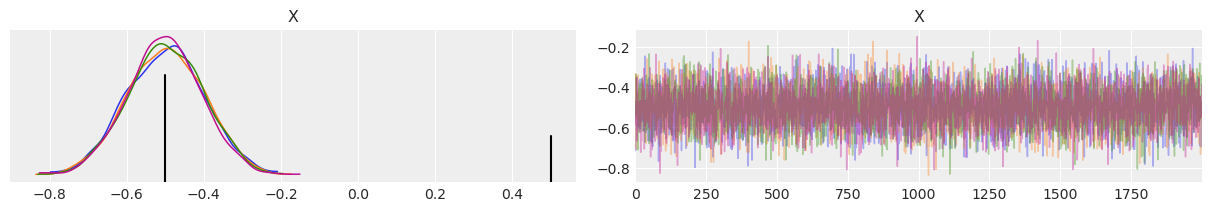

In [44]:
plt.figure()
ax = az.plot_trace(az_trace, compact=True)
for i in range(len(ax)):
    ax[i, 0].axvline(-0.5, 0, 0.7, color='k')
    ax[i, 0].axvline(0.5, 0, 0.3, color='k')
plt.show()

In [47]:
with model:
    
    part_local_trace = pm.sample_nfmc(2000, init_samples=None, nf_iter=40, chains=1, init_method='prior', 
                           local_thresh=3, local_step_size=1.0, local_grad=True, init_local=True, 
                           full_local=False, nf_local_iter=3, frac_validate=0.2, alpha=(0.0,0.0), 
                           parallel=False, NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True,
                           iteration=5)
    part_local_az_trace = az.from_pymc3(part_local_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0
/home/richard/pymc3_dev/pymc3/sampling.py:1924: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(


Number of points we perform additional local exploration around = 10
Using local exploration to improve the SINF initialization for 3 iterations.
Number of points we perform additional local exploration around = 27
Number of points we perform additional local exploration around = 72
Number of points we perform additional local exploration around = 114


Stage:   1, Normalizing Constant Estimate: 0.0029381807756886404
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.0029381807756886404


Re-initializing SINF fits using samples from latest iteration after local exploration.
No longer using local exploration after warmup iterations.


Stage:   2, Normalizing Constant Estimate: 0.004170932587956315
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.004170932587956315
Stage:   3, Normalizing Constant Estimate: 0.0035793014377621083
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.0035793014377621083
Stage:   4, Normalizing Constant Estimate: 0.003930879558486088
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 0.003930879558486088
Stage:   5, Normalizing Constant Estimate: 0.0038918305250571876
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 0.0038918305250571876


Stage:   6, Normalizing Constant Estimate: 0.00392949278900946
Normalizing constant estimate has stabilised - ending NF fits.


<Figure size 720x480 with 0 Axes>

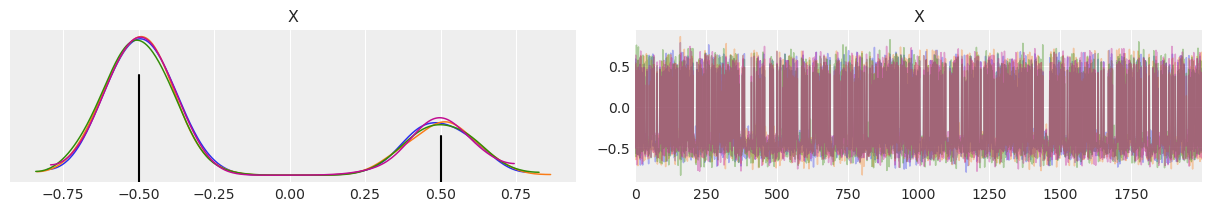

In [48]:
plt.figure()
ax = az.plot_trace(part_local_az_trace, compact=True)
for i in range(len(ax)):
    ax[i, 0].axvline(-0.5, 0, 0.7, color='k')
    ax[i, 0].axvline(0.5, 0, 0.3, color='k')
plt.show()

In [49]:
part_local_nf_evidence = part_local_trace.report.evidence
print(f'NFMC calculated evidence = {part_local_nf_evidence[0]}')
part_local_weighted_samples = part_local_trace.report.weighted_samples[0]
part_local_q0_samples = part_local_weighted_samples[:2000, ...]
part_local_importance_weights = part_local_trace.report.importance_weights
part_local_q0_weights = part_local_importance_weights[0][:2000]
part_local_az_summary = az.summary(part_local_az_trace)
print(part_local_az_summary)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


NFMC calculated evidence = 0.00392949278900946
       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
X[0] -0.216  0.456  -0.672    0.610      0.011    0.008    1872.0  1788.0   
X[1] -0.219  0.463  -0.668    0.635      0.011    0.008    1714.0  1714.0   
X[2] -0.222  0.466  -0.692    0.620      0.011    0.008    1726.0  1726.0   
X[3] -0.218  0.460  -0.683    0.605      0.011    0.008    1840.0  1840.0   

      ess_bulk  ess_tail  r_hat  
X[0]    1824.0    2004.0    NaN  
X[1]    1976.0    2047.0    NaN  
X[2]    1947.0    1921.0    NaN  
X[3]    1975.0    1919.0    NaN  


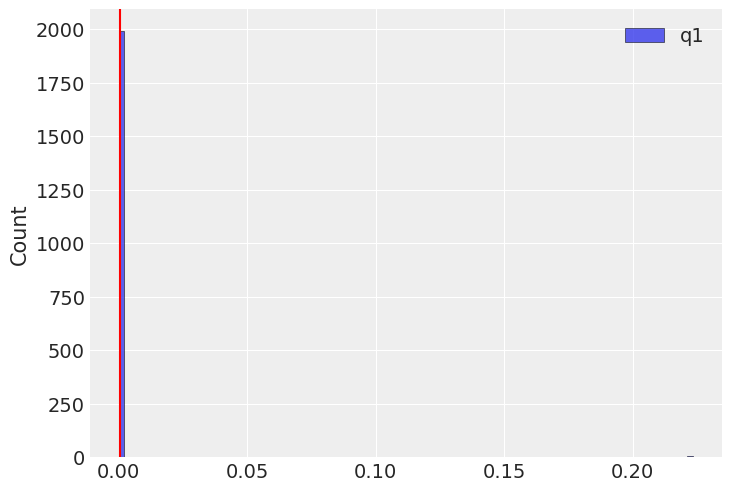

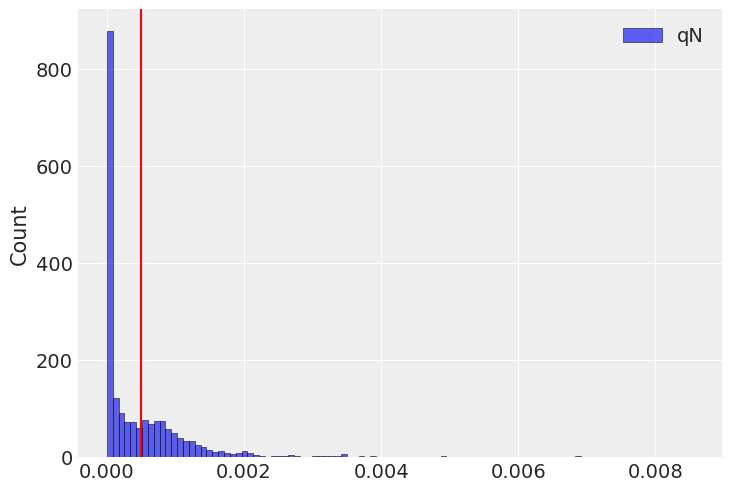

In [74]:
plt.figure()
sns.histplot(no_local_importance_weights[0][:2000], bins=100, label='q1')
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()

plt.figure()
sns.histplot(no_local_importance_weights[0][int(len(no_local_importance_weights[0]) - 2000):], 
             bins=100, label='qN')
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()

In [75]:
with model:
    az_smc_trace = az.from_pymc3(smc_trace)

In [76]:
smc_evidence = np.exp(smc_trace.report.log_marginal_likelihood)
print(f'SMC calculated evidence: {smc_evidence}')
az_smc_summary = az.summary(az_smc_trace)
print(az_smc_summary)

SMC calculated evidence: [0.00327851 0.00457559]
       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
X[0] -0.205  0.465  -0.677    0.608      0.011    0.008    1885.0  1885.0   
X[1] -0.202  0.468  -0.664    0.632      0.011    0.008    1912.0  1912.0   
X[2] -0.202  0.466  -0.675    0.612      0.011    0.007    1955.0  1955.0   
X[3] -0.204  0.467  -0.671    0.610      0.010    0.007    1996.0  1996.0   

      ess_bulk  ess_tail  r_hat  
X[0]    1877.0    1900.0    1.0  
X[1]    1785.0    1970.0    1.0  
X[2]    1983.0    1777.0    1.0  
X[3]    2112.0    2008.0    1.0  


<Figure size 720x480 with 0 Axes>

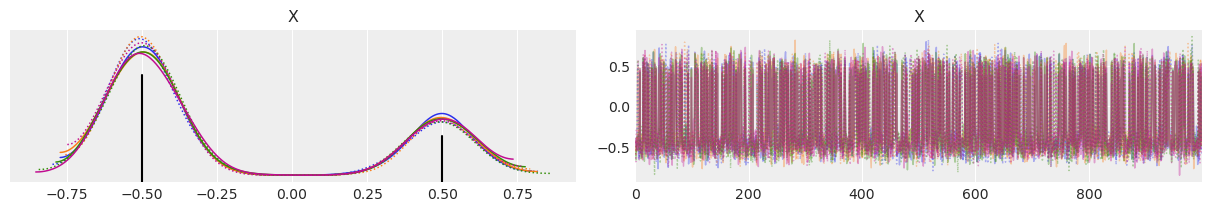

In [77]:
plt.figure()
ax = az.plot_trace(az_smc_trace, compact=True)
for i in range(len(ax)):
    ax[i, 0].axvline(-0.5, 0, 0.7, color='k')
    ax[i, 0].axvline(0.5, 0, 0.3, color='k')
plt.show()

<Figure size 720x480 with 0 Axes>

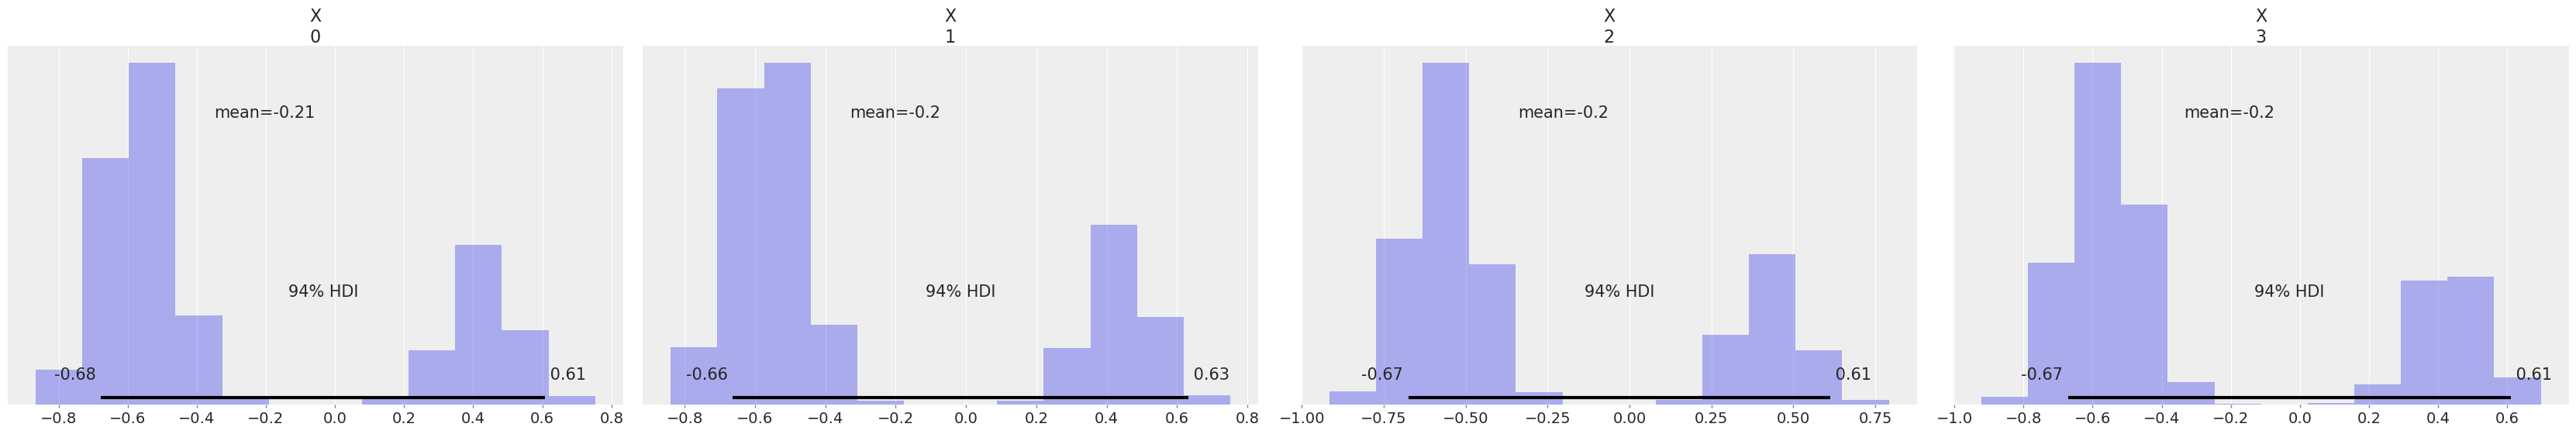

In [78]:
plt.figure()
az.plot_posterior(az_smc_trace, kind='hist')
plt.show()

Below I plot the X[0] posterior obtained from the NFMC and SMC runs. 

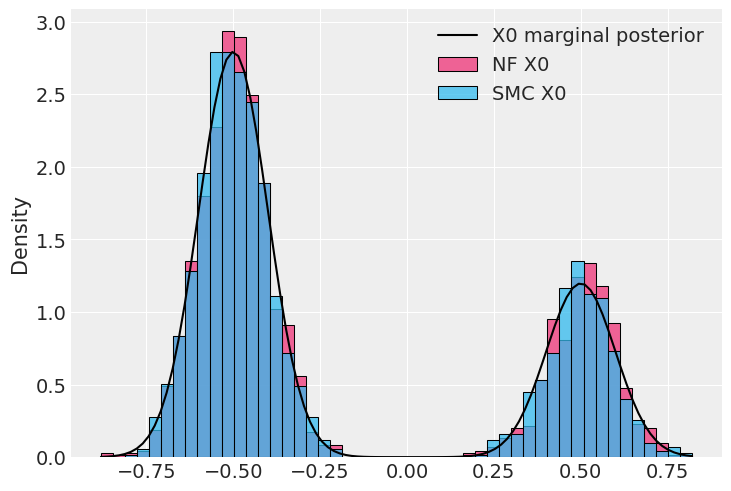

In [79]:
def marginal_two_gauss(x, mu1=0.5, mu2=-0.5, sigma=0.1):
    like1 = np.exp(-(x - mu1)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    like2 = np.exp(-(x - mu2)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return w1 * like1 + w2 * like2

nf_df = az_trace.to_dataframe()
smc_df = az_smc_trace.to_dataframe()

nf_x0 = nf_df[('X[0]', 0)].to_numpy()
nf_x1 = nf_df[('X[1]', 1)].to_numpy()
nf_x2 = nf_df[('X[2]', 2)].to_numpy()
nf_x3 = nf_df[('X[3]', 3)].to_numpy()
smc_x0 = smc_df[('X[0]', 0)].to_numpy()
smc_x1 = smc_df[('X[1]', 1)].to_numpy()
smc_x2 = smc_df[('X[2]', 2)].to_numpy()
smc_x3 = smc_df[('X[3]', 3)].to_numpy()

x_vals = np.linspace(min(np.amin(nf_x0), np.amin(smc_x0)), max(np.amax(nf_x0), np.amax(smc_x0)), 100)
y_vals = marginal_two_gauss(x_vals)

bins = np.linspace(min(np.amin(nf_x0), np.amin(smc_x0)), max(np.amax(nf_x0), np.amax(smc_x0)), 50)
plt.figure()
sns.histplot(nf_x0, label='NF X0', bins=bins, stat='density', color='#EE3377')
sns.histplot(smc_x0, label='SMC X0', bins=bins, stat='density', color='#33BBEE')
plt.plot(x_vals, y_vals, color='k', label='X0 marginal posterior')
plt.legend(loc='upper right')
plt.show()

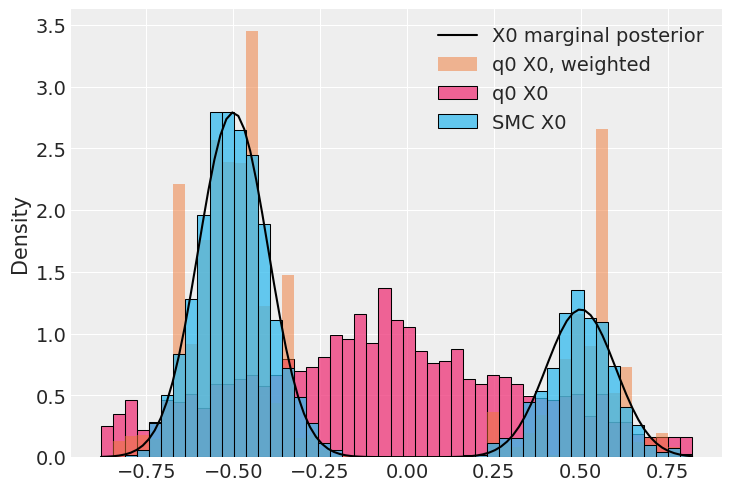

In [80]:
plt.figure()
sns.histplot(q0_samples[:,0], label='q0 X0', bins=bins, stat='density', color='#EE3377')
plt.hist(q0_samples[:,0], weights=q0_weights/np.sum(q0_weights), label='q0 X0, weighted', 
             bins=bins, density=True, color='#EE7733', alpha=0.5)
sns.histplot(smc_x0, label='SMC X0', bins=bins, stat='density', color='#33BBEE')
plt.plot(x_vals, y_vals, color='k', label='X0 marginal posterior')
plt.legend(loc='upper right')
plt.show()

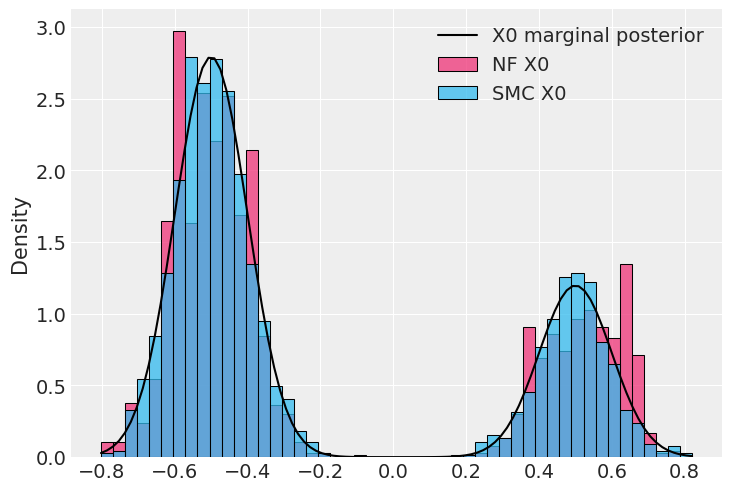

In [81]:
def marginal_two_gauss(x, mu1=0.5, mu2=-0.5, sigma=0.1):
    like1 = np.exp(-(x - mu1)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    like2 = np.exp(-(x - mu2)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return w1 * like1 + w2 * like2

no_local_nf_df = no_local_az_trace.to_dataframe()
smc_df = az_smc_trace.to_dataframe()

no_local_nf_x0 = no_local_nf_df[('X[0]', 0)].to_numpy()
no_local_nf_x1 = no_local_nf_df[('X[1]', 1)].to_numpy()
no_local_nf_x2 = no_local_nf_df[('X[2]', 2)].to_numpy()
no_local_nf_x3 = no_local_nf_df[('X[3]', 3)].to_numpy()
smc_x0 = smc_df[('X[0]', 0)].to_numpy()
smc_x1 = smc_df[('X[1]', 1)].to_numpy()
smc_x2 = smc_df[('X[2]', 2)].to_numpy()
smc_x3 = smc_df[('X[3]', 3)].to_numpy()

x_vals = np.linspace(min(np.amin(no_local_nf_x0), np.amin(smc_x0)), 
                     max(np.amax(no_local_nf_x0), np.amax(smc_x0)), 100)
y_vals = marginal_two_gauss(x_vals)

bins = np.linspace(min(np.amin(no_local_nf_x0), np.amin(smc_x0)), 
                   max(np.amax(no_local_nf_x0), np.amax(smc_x0)), 50)
plt.figure()
sns.histplot(no_local_nf_x0, label='NF X0', bins=bins, stat='density', color='#EE3377')
sns.histplot(smc_x0, label='SMC X0', bins=bins, stat='density', color='#33BBEE')
plt.plot(x_vals, y_vals, color='k', label='X0 marginal posterior')
plt.legend(loc='upper right')
plt.show()

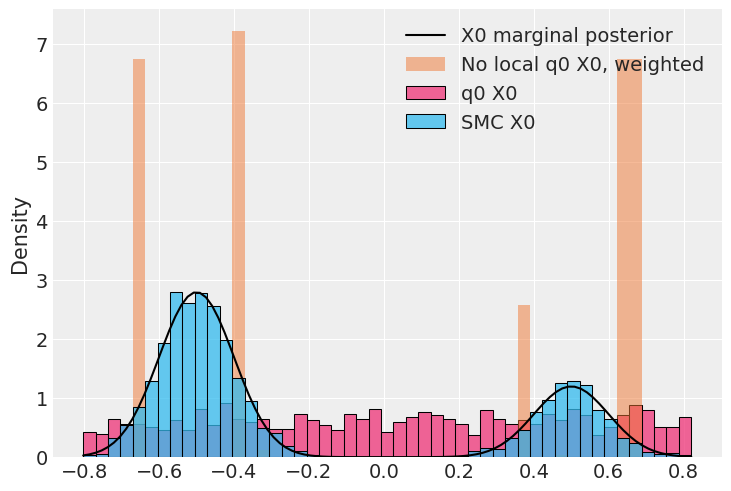

In [82]:
plt.figure()
sns.histplot(no_local_q0_samples[:,0], label='q0 X0', bins=bins, stat='density', color='#EE3377')
plt.hist(no_local_q0_samples[:,0], weights=no_local_q0_weights/np.sum(no_local_q0_weights), 
         label='No local q0 X0, weighted', bins=bins, density=True, color='#EE7733', alpha=0.5)
sns.histplot(smc_x0, label='SMC X0', bins=bins, stat='density', color='#33BBEE')
plt.plot(x_vals, y_vals, color='k', label='X0 marginal posterior')
plt.legend(loc='upper right')
plt.show()

In [14]:
rg_model = pm.Model()
x = np.arange(10)
y = 2 * x + 1 + np.random.normal(scale=0.1)

with rg_model:

    a = pm.Normal('a', mu=2, sigma=1)
    b = pm.Normal('b', mu=1, sigma=1)

    like = pm.Normal('like', mu=a*x+b, sigma=0.1, observed=y)
    
    '''
    nuts_trace = pm.sample(500)
    
    a_samples = nuts_trace.get_values('a')
    b_samples = nuts_trace.get_values('b')

    init_samples = np.column_stack((b_samples, a_samples))
    '''

with rg_model:
    
    rg_trace = pm.sample_nfmc(1000, init_method='full_rank', local_thresh=3, local_step_size=0.1, 
                              local_grad=True, init_local=True, full_local=True, nf_local_iter=0, 
                              nf_iter=20, chains=1, frac_validate=0.2, alpha=(0,0), parallel=False, 
                              bw_factor=2.0, k_trunc=0.25, pareto=True, iteration=5)
    rg_az_trace = az.from_pymc3(rg_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Initializing with full-rank EL2O approx family.



(2,)
MAP estimate = {'a': array(2.00007153), 'b': array(1.13115549)}
Got to MAP+LAPLACE before dying


Stage:   1, Normalizing Constant Estimate: 351.8441694765325
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 351.8441694765325


Final EL2O mu = [[1.13115549 2.00007153]]
Final EL2O Sigma = [[ 0.00344236 -0.00054351]
 [-0.00054351  0.0001209 ]]
Number of points we perform additional local exploration around = 0
Using local exploration at every iteration except the final one (where IW exceed the local threshold).


Stage:   2, Normalizing Constant Estimate: 342.74443571343096
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 342.74443571343096


Number of points we perform additional local exploration around = 0


Stage:   3, Normalizing Constant Estimate: 365.6439605398916
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 365.6439605398916


Number of points we perform additional local exploration around = 2


Stage:   4, Normalizing Constant Estimate: 370.65973460008905
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 370.65973460008905


Number of points we perform additional local exploration around = 1


Stage:   5, Normalizing Constant Estimate: 343.37315562038333
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 343.37315562038333


Number of points we perform additional local exploration around = 1
Number of points we perform additional local exploration around = 0
Stage:   6, Normalizing Constant Estimate: 340.40758872940177
Normalizing constant estimate has stabilised - ending NF fits.


<Figure size 720x480 with 0 Axes>

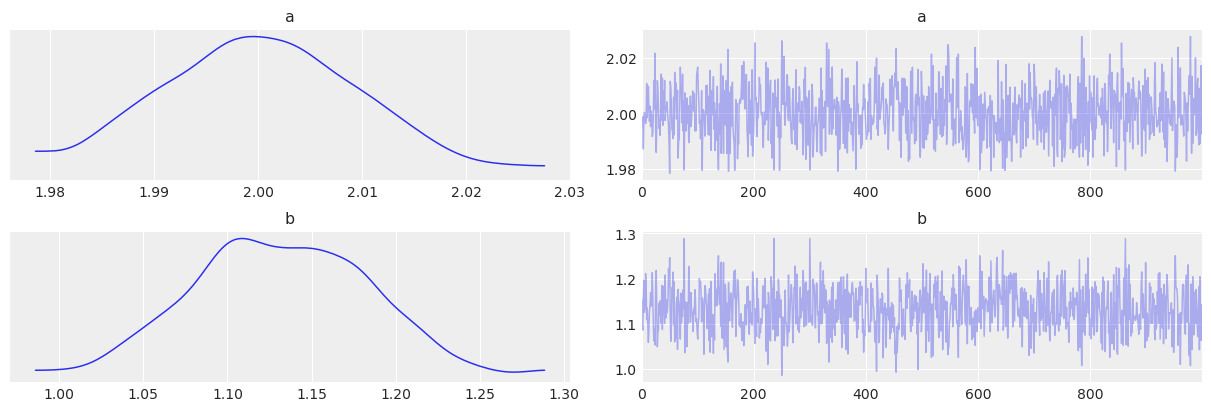

In [15]:
plt.figure()
ax = az.plot_trace(rg_az_trace)
plt.show()

In [16]:
with rg_model:
    
    rg_local_trace = pm.sample_nfmc(1000, init_method='full_rank', local_thresh=3, local_step_size=0.5, 
                              local_grad=True, init_local=True, full_local=False, nf_local_iter=0, 
                              nf_iter=20, chains=1, frac_validate=0.2, alpha=(0,0), parallel=False, 
                              bw_factor=2.0, k_trunc=0.25, pareto=True, iteration=5)
    rg_local_az_trace = az.from_pymc3(rg_local_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Initializing with full-rank EL2O approx family.



(2,)
MAP estimate = {'a': array(2.00007153), 'b': array(1.13115549)}
Got to MAP+LAPLACE before dying


Stage:   1, Normalizing Constant Estimate: 351.84416947653307
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 351.84416947653307


Final EL2O mu = [[1.13115549 2.00007153]]
Final EL2O Sigma = [[ 0.00344236 -0.00054351]
 [-0.00054351  0.0001209 ]]
Number of points we perform additional local exploration around = 0
No longer using local exploration after warmup iterations.


Stage:   2, Normalizing Constant Estimate: 346.74599194637614
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 346.74599194637614
Stage:   3, Normalizing Constant Estimate: 380.1957482096235
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 380.1957482096235


Stage:   4, Normalizing Constant Estimate: 379.2231269783751
Normalizing constant estimate has stabilised - ending NF fits.


<Figure size 720x480 with 0 Axes>

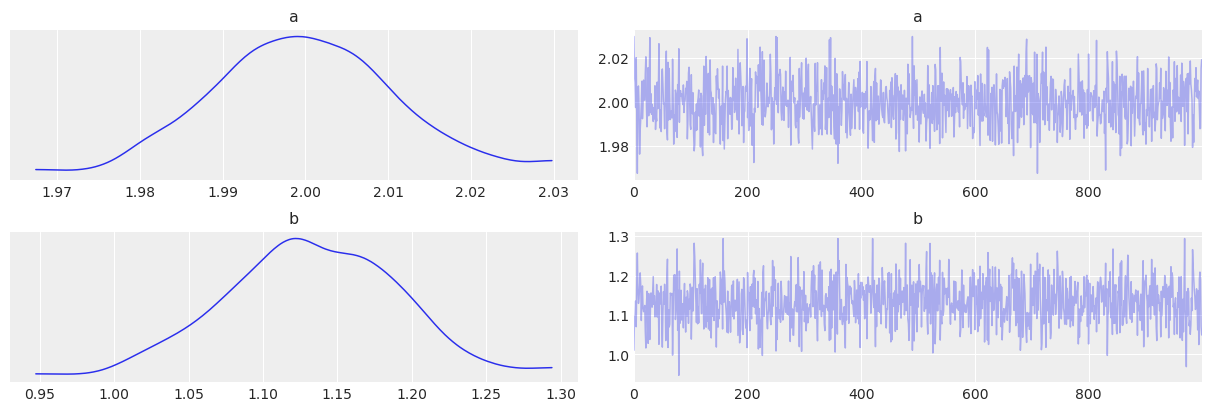

In [17]:
plt.figure()
ax = az.plot_trace(rg_local_az_trace)
plt.show()

Let's look at what happens if we initialize with samples from a Gaussian distribution that is too narrow.

In [18]:
rg_df = az.summary(rg_az_trace)
init_samples = np.random.multivariate_normal(mean=np.array([rg_df['mean']['b'], rg_df['mean']['a']]), 
                                             cov=np.diagflat(np.array([rg_df['sd']['b']**2, rg_df['sd']['a']**2]))/4, 
                                             size=2000)
with rg_model:
    
    rg_narrow_trace = pm.sample_nfmc(2000, init_samples=init_samples, init_method='prior',
                                     local_thresh=3, local_step_size=0.5, local_grad=True, 
                                     init_local=False, full_local=False, nf_local_iter=0,
                                     nf_iter=40, chains=1, frac_validate=0.2, alpha=(0.0,0.0), 
                                     parallel=False, bw_factor=2.0, iteration=5,
                                     k_trunc=0.25, pareto=True, norm_tol=1e-2)
    rg_narrow_az_trace = az.from_pymc3(rg_narrow_trace)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0
Stage:   1, Normalizing Constant Estimate: 240.83200147917873
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 240.83200147917873


No longer using local exploration after warmup iterations.


Stage:   2, Normalizing Constant Estimate: 344.6480423789991
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 344.6480423789991
Stage:   3, Normalizing Constant Estimate: 401.47904963262016
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 401.47904963262016
Stage:   4, Normalizing Constant Estimate: 340.30863015683883
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 340.30863015683883
Stage:   5, Normalizing Constant Estimate: 314.8930530140887
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 314.8930530140887
Stage:   6, Normalizing Constant Estimate: 308.27413861489623
INFO:pymc3:Stage:   6, Normalizing Constant Estimate: 308.27413861489623
Stage:   7, Normalizing Constant Estimate: 351.8002185033939
INFO:pymc3:Stage:   7, Normalizing Constant Estimate: 351.8002185033939
Stage:   8, Normalizing Constant Estimate: 337.6189958571122
INFO:pymc3:Stage:   8, Normalizing Constant Estimate: 337.6189958571122
Stage:   9, Normalizing Constant Estimate: 317.5346536218569
IN

Stage:  14, Normalizing Constant Estimate: 350.40194630290046
Normalizing constant estimate has stabilised - ending NF fits.


<Figure size 720x480 with 0 Axes>

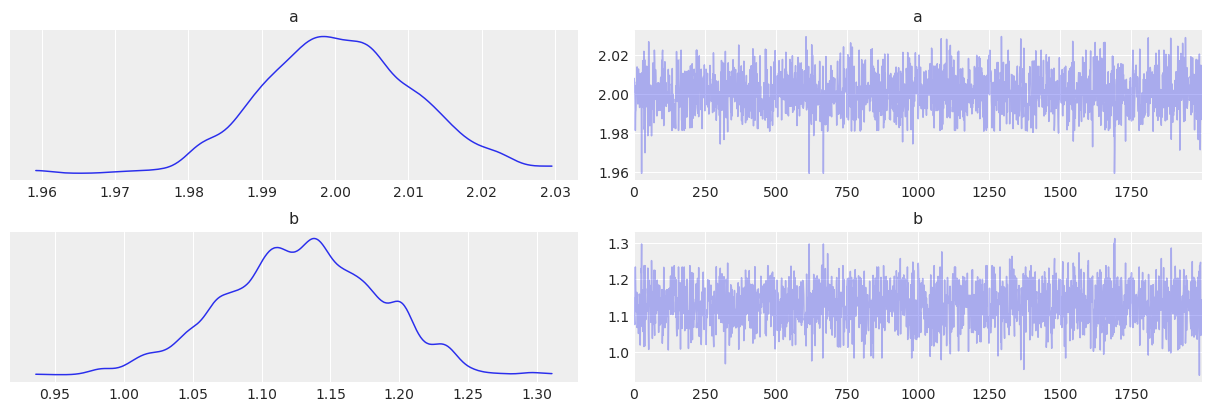

In [19]:
plt.figure()
ax = az.plot_trace(rg_narrow_az_trace)
plt.show()

In [38]:
rg_df = az.summary(rg_az_trace)
init_samples = np.random.multivariate_normal(mean=np.array([rg_df['mean']['b'], rg_df['mean']['a']]), 
                                             cov=np.diagflat(np.array([rg_df['sd']['b']**2, rg_df['sd']['a']**2]))/4, 
                                             size=2000)
with rg_model:
    
    rg_local_narrow_trace = pm.sample_nfmc(2000, init_samples=init_samples, init_method='prior',
                                           local_thresh=3, local_step_size=0.1, local_grad=True, 
                                           init_local=True, full_local=True, nf_local_iter=0,
                                           nf_iter=40, chains=1, frac_validate=0.2, alpha=(0.0,0.0), 
                                           parallel=False, bw_factor=2.0, iteration=5,
                                           k_trunc=0.25, pareto=True, norm_tol=1e-2)
    rg_local_narrow_az_trace = az.from_pymc3(rg_local_narrow_trace)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Number of points we perform additional local exploration around = 92


Stage:   1, Normalizing Constant Estimate: 276.8029186554467
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 276.8029186554467


Using local exploration at every iteration except the final one (where IW exceed the local threshold).
Number of points we perform additional local exploration around = 29


Stage:   2, Normalizing Constant Estimate: 327.8770350557731
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 327.8770350557731


Number of points we perform additional local exploration around = 15


Stage:   3, Normalizing Constant Estimate: 353.0760362545134
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 353.0760362545134
Stage:   4, Normalizing Constant Estimate: 322.6634995054913
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 322.6634995054913


Number of points we perform additional local exploration around = 12
Number of points we perform additional local exploration around = 15


Stage:   5, Normalizing Constant Estimate: 307.09406763142624
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 307.09406763142624
Stage:   6, Normalizing Constant Estimate: 303.2679362986018
INFO:pymc3:Stage:   6, Normalizing Constant Estimate: 303.2679362986018


Number of points we perform additional local exploration around = 10


Stage:   7, Normalizing Constant Estimate: 342.678518925632
INFO:pymc3:Stage:   7, Normalizing Constant Estimate: 342.678518925632


Number of points we perform additional local exploration around = 10


Stage:   8, Normalizing Constant Estimate: 359.11979457904175
INFO:pymc3:Stage:   8, Normalizing Constant Estimate: 359.11979457904175


Number of points we perform additional local exploration around = 7


Stage:   9, Normalizing Constant Estimate: 350.9136035630327
INFO:pymc3:Stage:   9, Normalizing Constant Estimate: 350.9136035630327


Number of points we perform additional local exploration around = 10


Stage:  10, Normalizing Constant Estimate: 346.1641036392997
INFO:pymc3:Stage:  10, Normalizing Constant Estimate: 346.1641036392997


Number of points we perform additional local exploration around = 10


Stage:  11, Normalizing Constant Estimate: 338.22218181513017
INFO:pymc3:Stage:  11, Normalizing Constant Estimate: 338.22218181513017


Number of points we perform additional local exploration around = 8


Stage:  12, Normalizing Constant Estimate: 348.02470669570533
INFO:pymc3:Stage:  12, Normalizing Constant Estimate: 348.02470669570533


Number of points we perform additional local exploration around = 8
Number of points we perform additional local exploration around = 4
Stage:  13, Normalizing Constant Estimate: 346.4240579296014
Normalizing constant estimate has stabilised - ending NF fits.
Performing final NF fit without local exploration.


<Figure size 720x480 with 0 Axes>

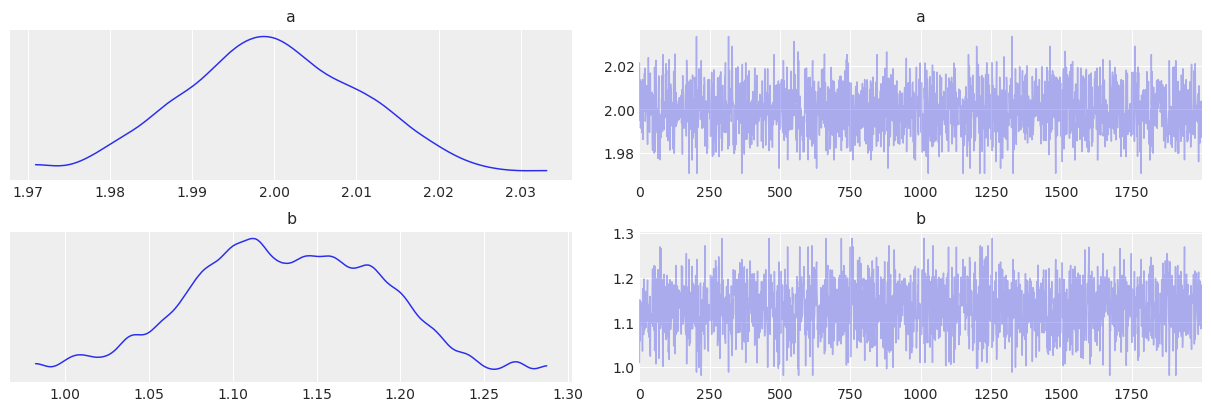

In [39]:
plt.figure()
ax = az.plot_trace(rg_local_narrow_az_trace)
plt.show()

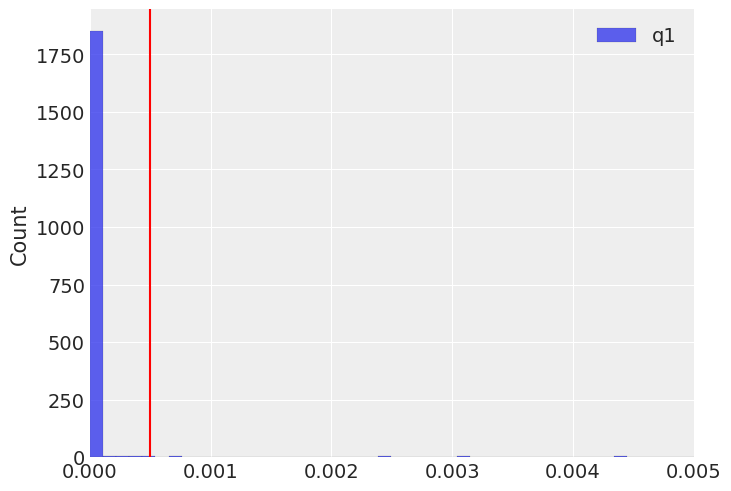

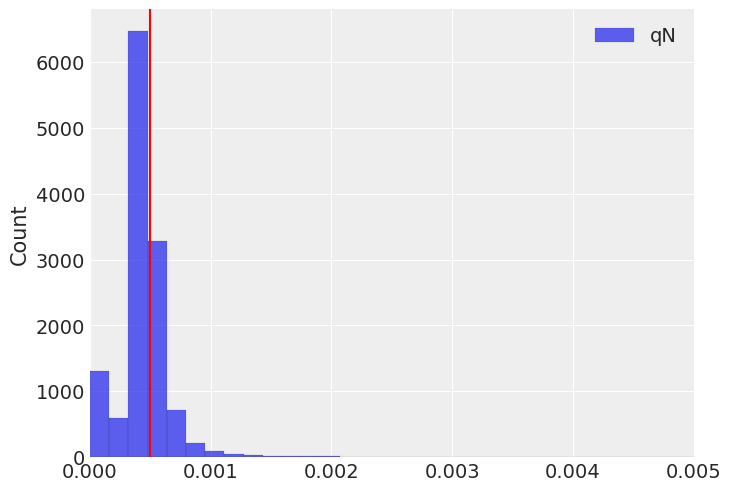

In [172]:
rg_narrow_importance_weights = rg_narrow_trace.report.importance_weights

plt.figure()
sns.histplot(rg_narrow_importance_weights[0][:2000], bins=500, label='q1')
plt.xlim(0, 0.005)
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()


plt.figure()
sns.histplot(rg_narrow_importance_weights[0][int(len(rg_importance_weights[0]) - 2000):], bins=500, label='qN')
plt.xlim(0, 0.005)
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()


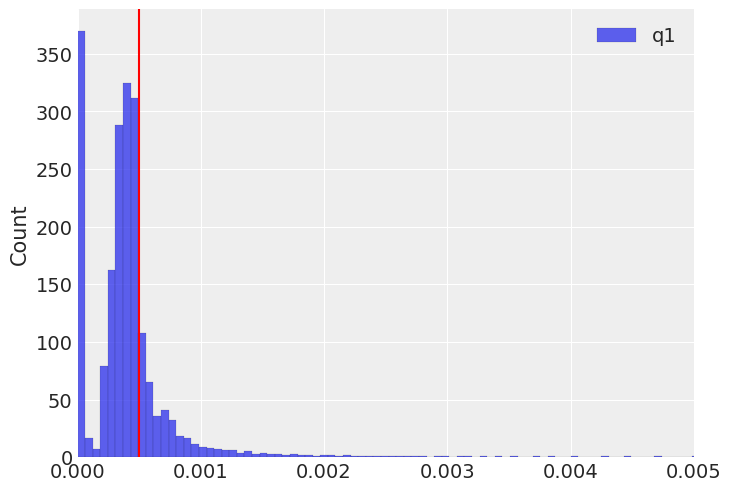

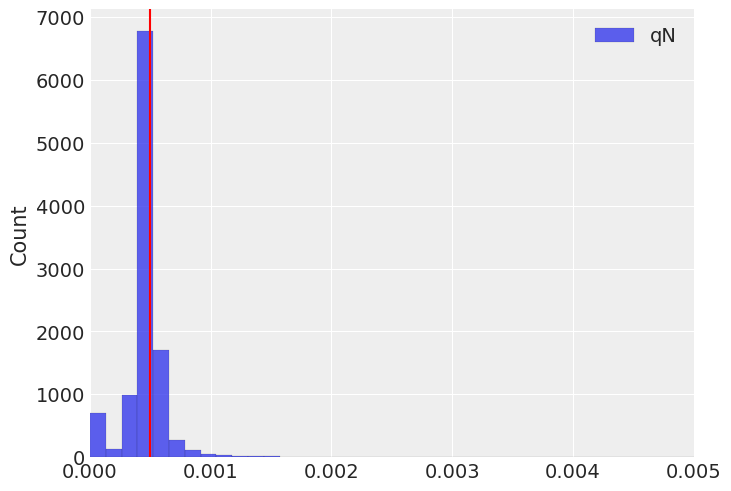

In [171]:
rg_local_narrow_importance_weights = rg_local_narrow_trace.report.importance_weights

plt.figure()
sns.histplot(rg_local_narrow_importance_weights[0][:2000], bins=500, label='q1')
plt.xlim(0, 0.005)
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()


plt.figure()
sns.histplot(rg_local_narrow_importance_weights[0][int(len(rg_importance_weights[0]) - 2000):], 
             bins=500, label='qN')
plt.xlim(0, 0.005)
plt.axvline(x=1/2000, color='r')
plt.legend(loc='upper right')
plt.show()

In [30]:
with rg_model:
    nuts_az_trace = az.from_pymc3(nuts_trace)

<Figure size 720x480 with 0 Axes>

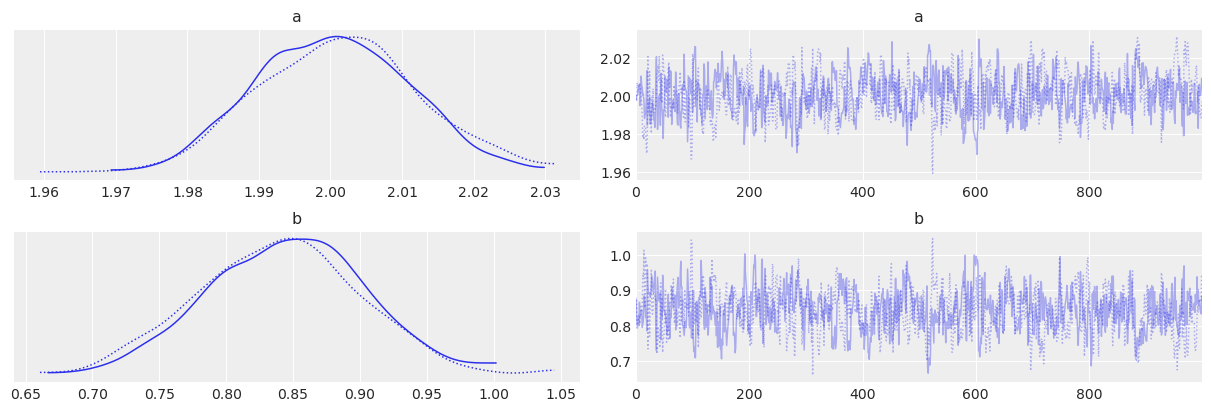

In [31]:
plt.figure()
ax = az.plot_trace(nuts_az_trace)
plt.show()

In [52]:
def z_integrand(a, b):
    p_a = np.exp(-(a - 2)**2 / 2) / np.sqrt(2 * np.pi)
    p_b = np.exp(-(b - 1)**2 / 2) / np.sqrt(2 * np.pi)
    l = np.prod(np.exp(-(y - a * x - b)**2 / (2 * 0.1**2)) / np.sqrt(2 * np.pi * 0.1**2))
    return l * p_a * p_b

from scipy import integrate
result = integrate.dblquad(z_integrand, 0.8, 1.2, 1.96, 2.04)
print(result)

(354.47752481652395, 1.4508249154328995e-05)


Quick ring density test ...

In [2]:
a = 2
b = 1
n = 4

def ring(X):

    return -((X[-1]**2 + X[0]**2 - a)**2 / b)**2 - tt.sum(((X[:-1]**2 + X[1:]**2 - a)**2 / b)**2)
    
with pm.Model() as ring_model:
    
    X = pm.Uniform(
        "X",
        shape=n,
        lower=-5.0,
        upper=5.0,
        testval=1.0,
    )
    
    llk = pm.Potential("llk", ring(X))
    
    
    ring_trace = pm.sample_nfmc(2000, init_method='map+laplace', local_thresh=4, local_step_size=1.0, 
                                local_grad=True, init_local=True, full_local=True, nf_local_iter=0,
                                nf_iter=40, chains=1,  frac_validate=0.2, alpha=(0,0), parallel=False,
                                NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True, iteration=5)
    az_ring_trace = az.from_pymc3(ring_trace)

Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0


Using map+laplace to initialize.


[0.40546511 0.40546511 0.40546511 0.40546511]
Number of points we perform additional local exploration around = 15


Stage:   1, Normalizing Constant Estimate: 0.001378551333464608
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.001378551333464608


Using local exploration at every iteration except the final one (where IW exceed the local threshold).
Number of points we perform additional local exploration around = 99


Stage:   2, Normalizing Constant Estimate: 0.0011743923774816549
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.0011743923774816549


Number of points we perform additional local exploration around = 89


Stage:   3, Normalizing Constant Estimate: 0.0012559710071068993
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.0012559710071068993


Number of points we perform additional local exploration around = 117


Stage:   4, Normalizing Constant Estimate: 0.0013157522921570942
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 0.0013157522921570942


Number of points we perform additional local exploration around = 139


Stage:   5, Normalizing Constant Estimate: 0.0012361987252264817
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 0.0012361987252264817


Number of points we perform additional local exploration around = 141


Stage:   6, Normalizing Constant Estimate: 0.0012613461926470825
INFO:pymc3:Stage:   6, Normalizing Constant Estimate: 0.0012613461926470825


Number of points we perform additional local exploration around = 137


Stage:   7, Normalizing Constant Estimate: 0.0012306427766459176
INFO:pymc3:Stage:   7, Normalizing Constant Estimate: 0.0012306427766459176


Number of points we perform additional local exploration around = 146


Stage:   8, Normalizing Constant Estimate: 0.0011720619304387168
INFO:pymc3:Stage:   8, Normalizing Constant Estimate: 0.0011720619304387168


Number of points we perform additional local exploration around = 119


Stage:   9, Normalizing Constant Estimate: 0.001226088544388082
INFO:pymc3:Stage:   9, Normalizing Constant Estimate: 0.001226088544388082


Number of points we perform additional local exploration around = 146


Stage:  10, Normalizing Constant Estimate: 0.0012065459871813367
INFO:pymc3:Stage:  10, Normalizing Constant Estimate: 0.0012065459871813367


Number of points we perform additional local exploration around = 76


Stage:  11, Normalizing Constant Estimate: 0.0011711699741158194
INFO:pymc3:Stage:  11, Normalizing Constant Estimate: 0.0011711699741158194


Number of points we perform additional local exploration around = 63
Stage:  12, Normalizing Constant Estimate: 0.00118190808714303
Normalizing constant estimate has stabilised - ending NF fits.
Performing final NF fit without local exploration.


<Figure size 720x480 with 0 Axes>

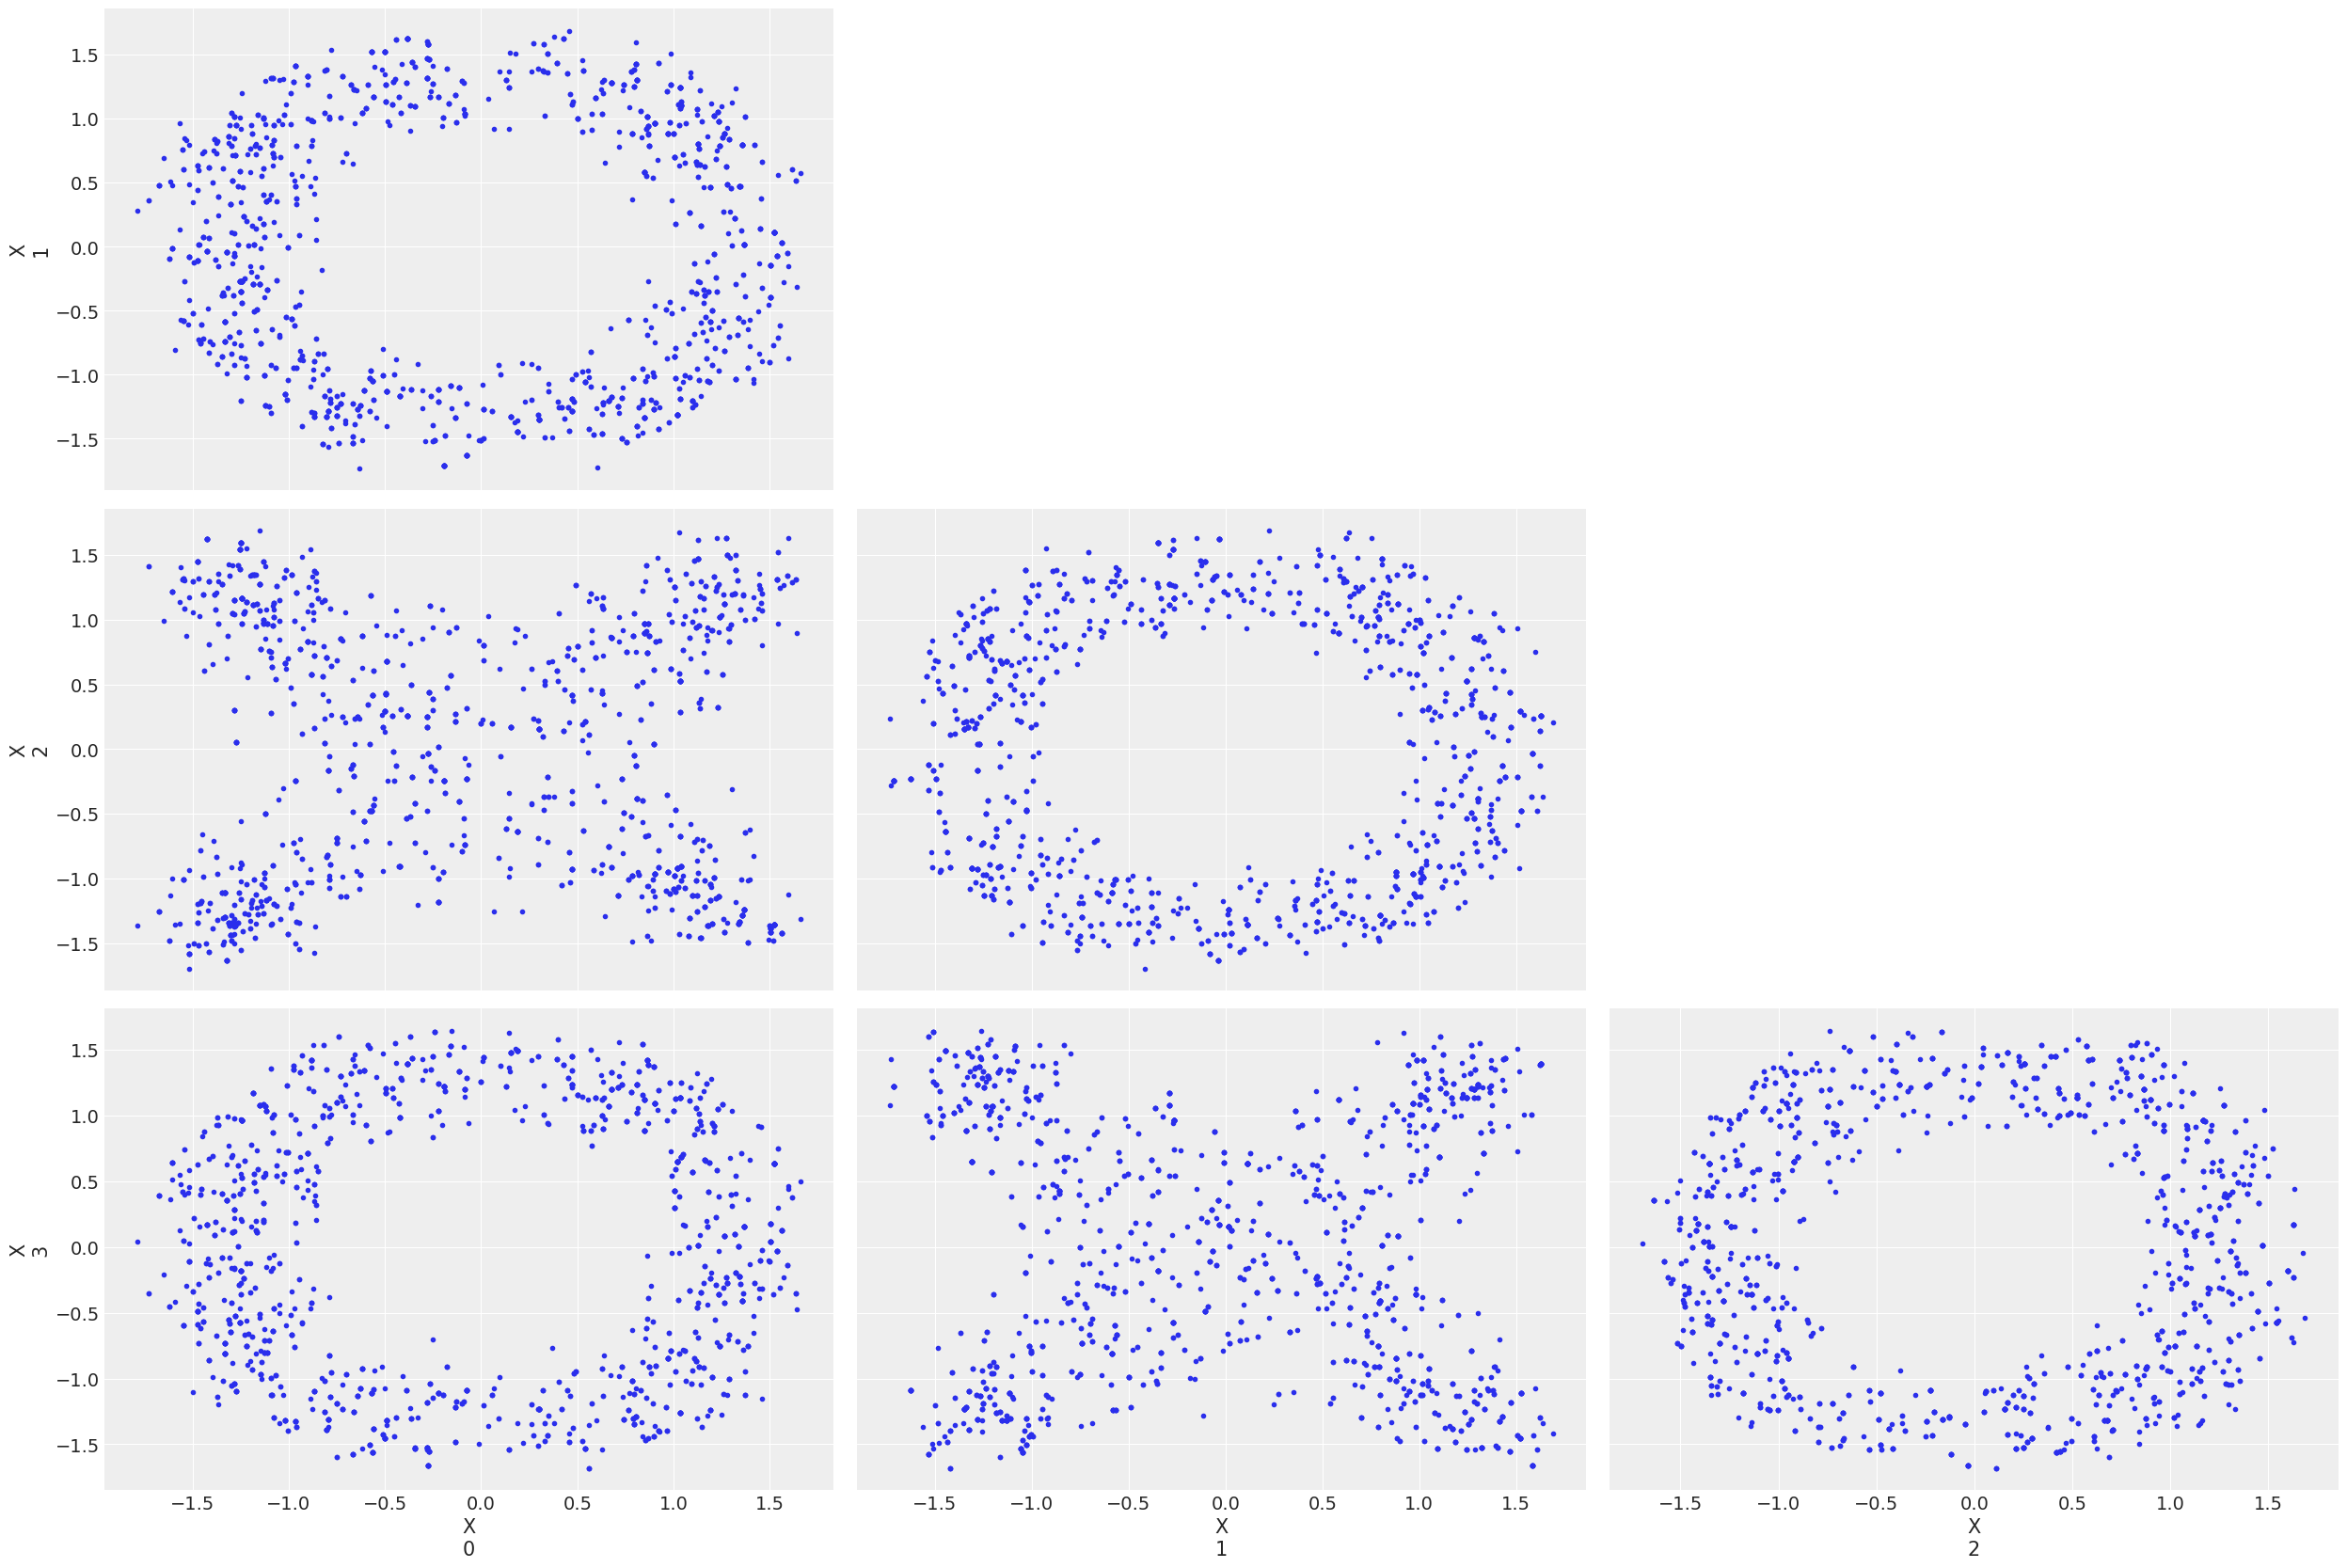

<Figure size 720x480 with 0 Axes>

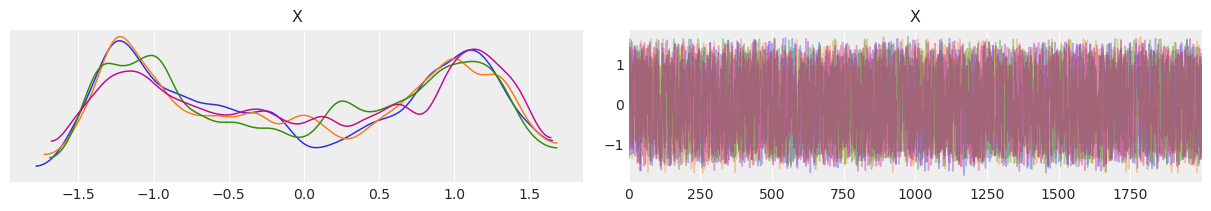

In [3]:
plt.figure()
az.plot_pair(az_ring_trace)
plt.show()

plt.figure()
az.plot_trace(az_ring_trace)
plt.show()

In [4]:
with ring_model:
    ring_trace = pm.sample_nfmc(2000, init_method='map+laplace', local_thresh=4, local_step_size=0.5, 
                                local_grad=True, init_local=False, full_local=True, nf_local_iter=0,
                                nf_iter=40, chains=1,  frac_validate=0.2, alpha=(0,0), parallel=False,
                                NBfirstlayer=True, bw_factor=2.0, k_trunc=0.25, pareto=True, iteration=5)
    az_ring_trace = az.from_pymc3(ring_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Using map+laplace to initialize.


/home/richard/anaconda3/envs/pymc3_dev/lib/python3.9/site-packages/arviz/stats/stats.py:945: RuntimeWarning: overflow encountered in expm1
  x = np.expm1(-kappa * np.log1p(-probs)) / kappa
Stage:   1, Normalizing Constant Estimate: 0.0012533043688164748
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.0012533043688164748



[0.40546511 0.40546511 0.40546511 0.40546511]
Using local exploration at every iteration except the final one (where IW exceed the local threshold).
Number of points we perform additional local exploration around = 71


Stage:   2, Normalizing Constant Estimate: 0.0013518894719469
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.0013518894719469


Number of points we perform additional local exploration around = 88


Stage:   3, Normalizing Constant Estimate: 0.0008913449942450067
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.0008913449942450067


Number of points we perform additional local exploration around = 84


Stage:   4, Normalizing Constant Estimate: 0.0017202549070579579
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 0.0017202549070579579


Number of points we perform additional local exploration around = 104


Stage:   5, Normalizing Constant Estimate: 0.0012591168261502418
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 0.0012591168261502418


Number of points we perform additional local exploration around = 149


Stage:   6, Normalizing Constant Estimate: 0.001384550908109287
INFO:pymc3:Stage:   6, Normalizing Constant Estimate: 0.001384550908109287


Number of points we perform additional local exploration around = 126


Stage:   7, Normalizing Constant Estimate: 0.0011198391922235737
INFO:pymc3:Stage:   7, Normalizing Constant Estimate: 0.0011198391922235737


Number of points we perform additional local exploration around = 118


Stage:   8, Normalizing Constant Estimate: 0.0012986893448760067
INFO:pymc3:Stage:   8, Normalizing Constant Estimate: 0.0012986893448760067


Number of points we perform additional local exploration around = 118


Stage:   9, Normalizing Constant Estimate: 0.0012100597357650499
INFO:pymc3:Stage:   9, Normalizing Constant Estimate: 0.0012100597357650499


Number of points we perform additional local exploration around = 108


Stage:  10, Normalizing Constant Estimate: 0.0012241021983848402
INFO:pymc3:Stage:  10, Normalizing Constant Estimate: 0.0012241021983848402


Number of points we perform additional local exploration around = 97


Stage:  11, Normalizing Constant Estimate: 0.0011969626656448764
INFO:pymc3:Stage:  11, Normalizing Constant Estimate: 0.0011969626656448764


Number of points we perform additional local exploration around = 122
Stage:  12, Normalizing Constant Estimate: 0.0011891927305410707
Normalizing constant estimate has stabilised - ending NF fits.
Performing final NF fit without local exploration.


<Figure size 720x480 with 0 Axes>

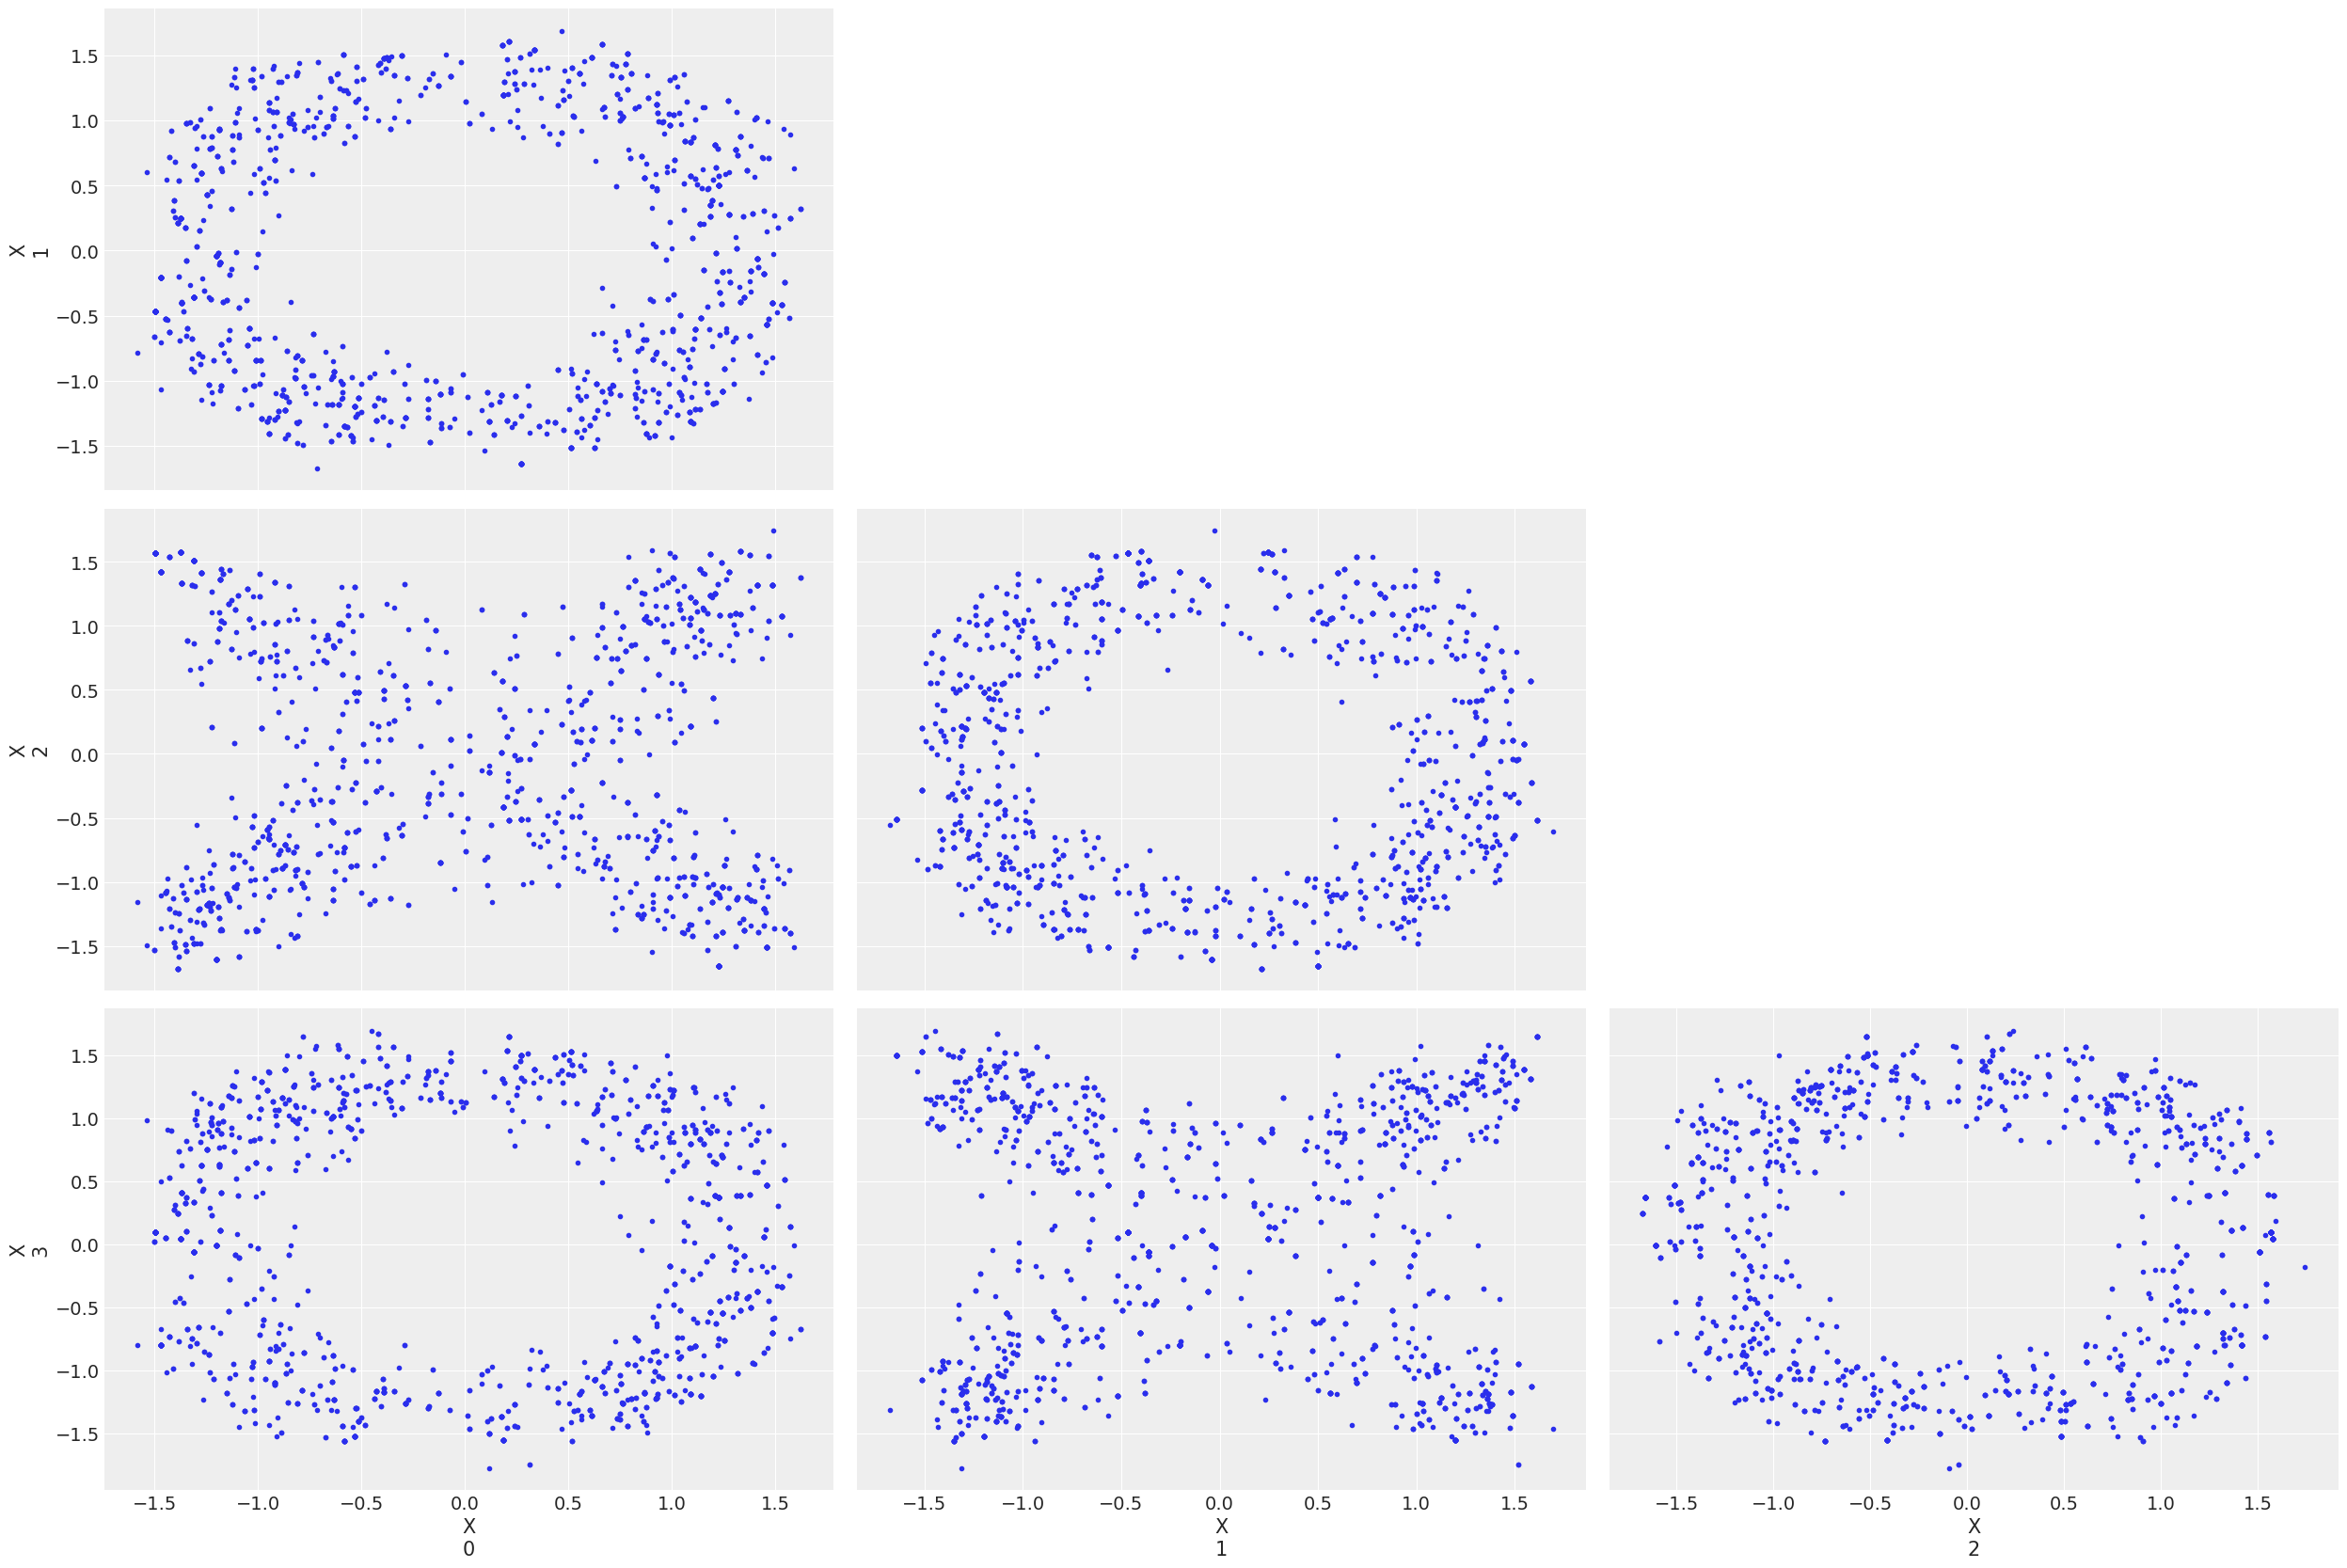

<Figure size 720x480 with 0 Axes>

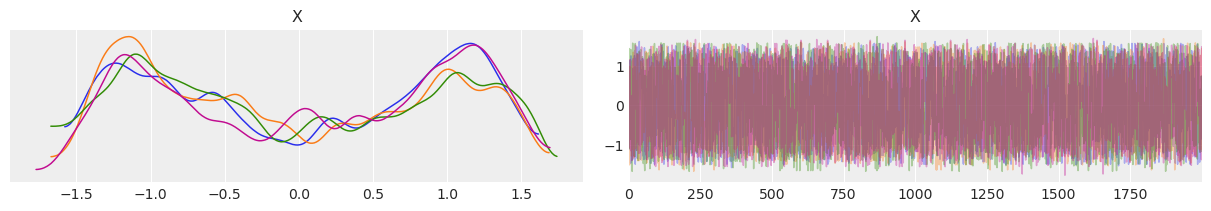

In [5]:
plt.figure()
az.plot_pair(az_ring_trace)
plt.show()

plt.figure()
az.plot_trace(az_ring_trace)
plt.show()

In [7]:
with ring_model:
    ring_trace = pm.sample_nfmc(2000, init_method='map+laplace', local_thresh=4, local_step_size=2.0, 
                                local_grad=True, init_local=True, full_local=True, nf_local_iter=0,
                                nf_iter=40, chains=1,  frac_validate=0.2, alpha=(0,0), parallel=False,
                                NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True, iteration=5)
    az_ring_trace = az.from_pymc3(ring_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Using map+laplace to initialize.



[0.40546511 0.40546511 0.40546511 0.40546511]
Number of points we perform additional local exploration around = 13


/home/richard/anaconda3/envs/pymc3_dev/lib/python3.9/site-packages/arviz/stats/stats.py:945: RuntimeWarning: overflow encountered in expm1
  x = np.expm1(-kappa * np.log1p(-probs)) / kappa
Stage:   1, Normalizing Constant Estimate: 0.0009415898468340786
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.0009415898468340786


Using local exploration at every iteration except the final one (where IW exceed the local threshold).
Number of points we perform additional local exploration around = 32


Stage:   2, Normalizing Constant Estimate: 0.00039794247212310497
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.00039794247212310497


Number of points we perform additional local exploration around = 64


Stage:   3, Normalizing Constant Estimate: 0.0025773715039548156
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.0025773715039548156


Number of points we perform additional local exploration around = 80


Stage:   4, Normalizing Constant Estimate: 0.0008403161335713025
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 0.0008403161335713025


Number of points we perform additional local exploration around = 87


Stage:   5, Normalizing Constant Estimate: 0.0009577051527692961
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 0.0009577051527692961


Number of points we perform additional local exploration around = 86


Stage:   6, Normalizing Constant Estimate: 0.0011835571643763428
INFO:pymc3:Stage:   6, Normalizing Constant Estimate: 0.0011835571643763428


Number of points we perform additional local exploration around = 87


Stage:   7, Normalizing Constant Estimate: 0.0012526309383325794
INFO:pymc3:Stage:   7, Normalizing Constant Estimate: 0.0012526309383325794


Number of points we perform additional local exploration around = 92


Stage:   8, Normalizing Constant Estimate: 0.0011285274788708968
INFO:pymc3:Stage:   8, Normalizing Constant Estimate: 0.0011285274788708968


Number of points we perform additional local exploration around = 104


Stage:   9, Normalizing Constant Estimate: 0.0012545295303581447
INFO:pymc3:Stage:   9, Normalizing Constant Estimate: 0.0012545295303581447


Number of points we perform additional local exploration around = 103


Stage:  10, Normalizing Constant Estimate: 0.001225547553494771
INFO:pymc3:Stage:  10, Normalizing Constant Estimate: 0.001225547553494771


Number of points we perform additional local exploration around = 109


Stage:  11, Normalizing Constant Estimate: 0.0011787125091565355
INFO:pymc3:Stage:  11, Normalizing Constant Estimate: 0.0011787125091565355


Number of points we perform additional local exploration around = 114


Stage:  12, Normalizing Constant Estimate: 0.0012099611151504374
INFO:pymc3:Stage:  12, Normalizing Constant Estimate: 0.0012099611151504374


Number of points we perform additional local exploration around = 125


Stage:  13, Normalizing Constant Estimate: 0.0012522037611861268
INFO:pymc3:Stage:  13, Normalizing Constant Estimate: 0.0012522037611861268


Number of points we perform additional local exploration around = 105


Stage:  14, Normalizing Constant Estimate: 0.0012006747919524404
INFO:pymc3:Stage:  14, Normalizing Constant Estimate: 0.0012006747919524404


Number of points we perform additional local exploration around = 104


Stage:  15, Normalizing Constant Estimate: 0.0011828560686864683
INFO:pymc3:Stage:  15, Normalizing Constant Estimate: 0.0011828560686864683


Number of points we perform additional local exploration around = 117


Stage:  16, Normalizing Constant Estimate: 0.001167416246381222
INFO:pymc3:Stage:  16, Normalizing Constant Estimate: 0.001167416246381222


Number of points we perform additional local exploration around = 126


Stage:  17, Normalizing Constant Estimate: 0.0012087736493037503
INFO:pymc3:Stage:  17, Normalizing Constant Estimate: 0.0012087736493037503


Number of points we perform additional local exploration around = 119


Stage:  18, Normalizing Constant Estimate: 0.0011135817546312628
INFO:pymc3:Stage:  18, Normalizing Constant Estimate: 0.0011135817546312628


Number of points we perform additional local exploration around = 83


Stage:  19, Normalizing Constant Estimate: 0.0011548992519814021
INFO:pymc3:Stage:  19, Normalizing Constant Estimate: 0.0011548992519814021


Number of points we perform additional local exploration around = 111


Stage:  20, Normalizing Constant Estimate: 0.0011761130094902691
INFO:pymc3:Stage:  20, Normalizing Constant Estimate: 0.0011761130094902691


Number of points we perform additional local exploration around = 89
Stage:  21, Normalizing Constant Estimate: 0.0011786532418749166
Normalizing constant estimate has stabilised - ending NF fits.
Performing final NF fit without local exploration.


<Figure size 720x480 with 0 Axes>

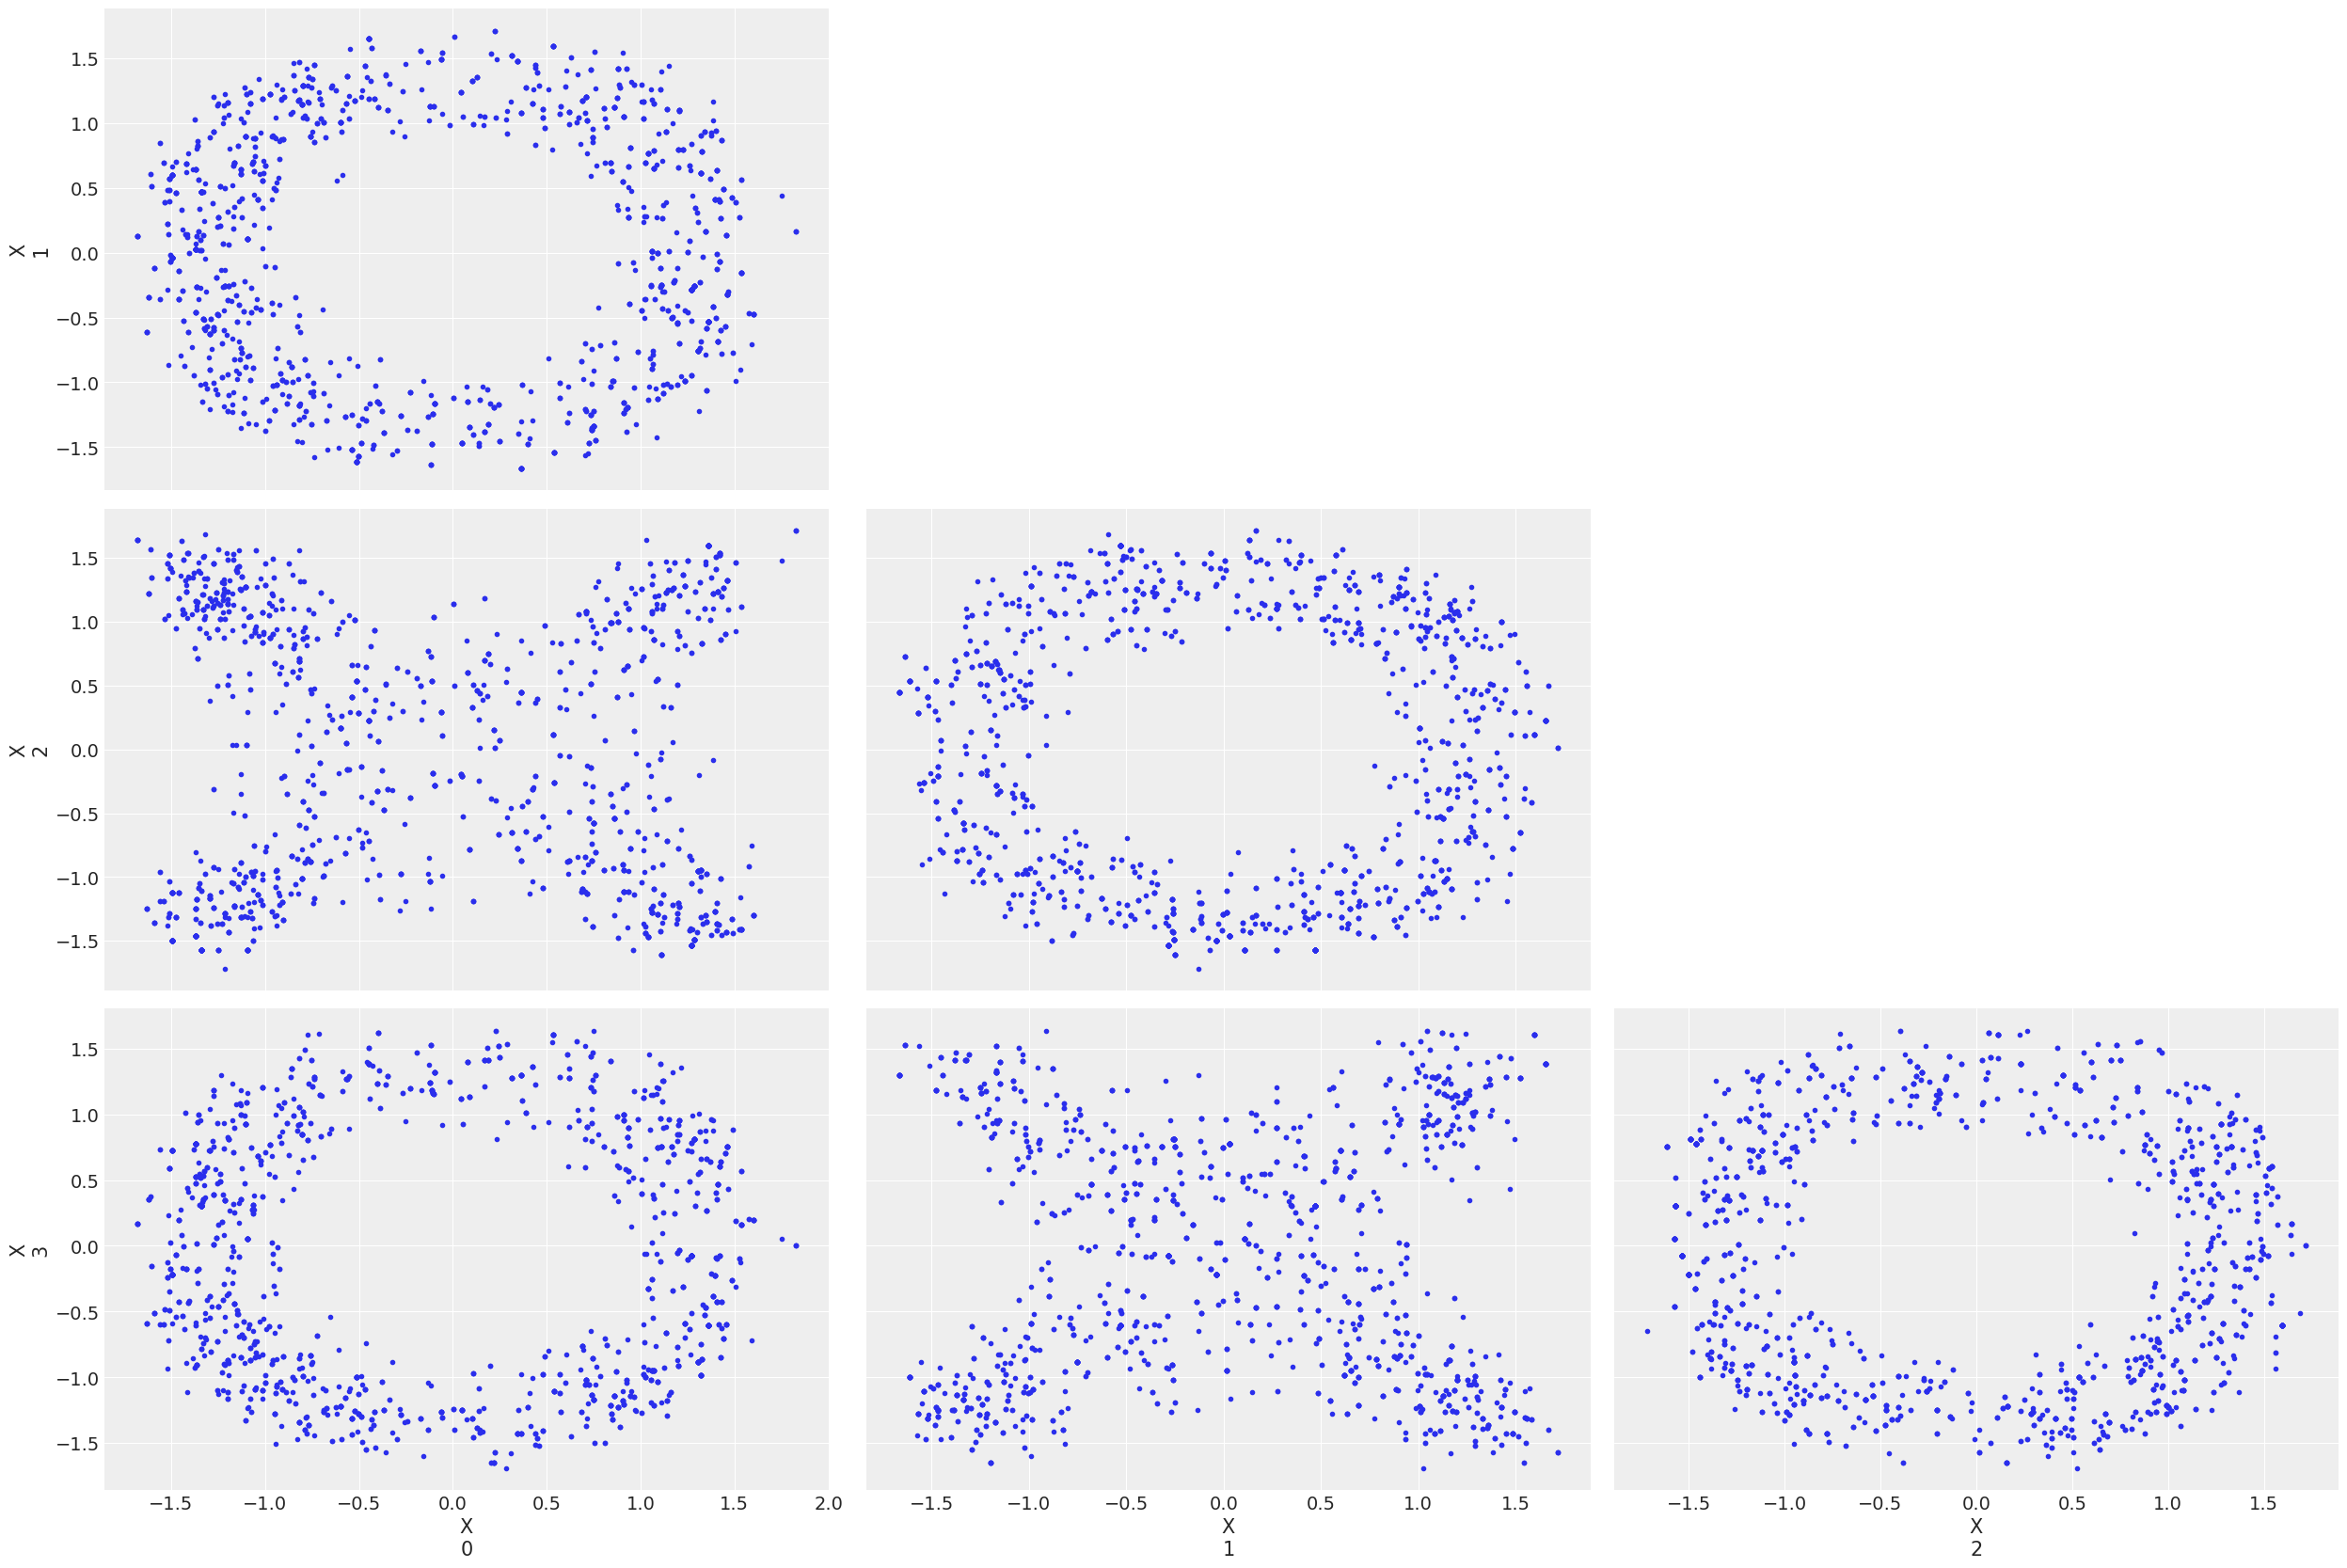

<Figure size 720x480 with 0 Axes>

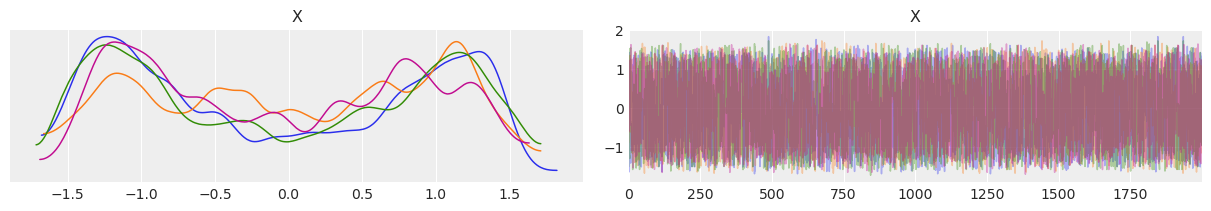

In [8]:
plt.figure()
az.plot_pair(az_ring_trace)
plt.show()

plt.figure()
az.plot_trace(az_ring_trace)
plt.show()

In [10]:
with ring_model:
    ring_trace = pm.sample_nfmc(2000, init_method='map+laplace', local_thresh=4, local_step_size=1.0, 
                                local_grad=True, init_local=True, full_local=False, nf_local_iter=5,
                                nf_iter=40, chains=1,  frac_validate=0.2, alpha=(0,0), parallel=False,
                                NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True, iteration=5)
    az_ring_trace = az.from_pymc3(ring_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Using map+laplace to initialize.



[0.40546511 0.40546511 0.40546511 0.40546511]
Number of points we perform additional local exploration around = 17


/home/richard/anaconda3/envs/pymc3_dev/lib/python3.9/site-packages/arviz/stats/stats.py:945: RuntimeWarning: overflow encountered in expm1
  x = np.expm1(-kappa * np.log1p(-probs)) / kappa


Using local exploration to improve the SINF initialization for 5 iterations.
Number of points we perform additional local exploration around = 89
Number of points we perform additional local exploration around = 100
Number of points we perform additional local exploration around = 105
Number of points we perform additional local exploration around = 126
Number of points we perform additional local exploration around = 113


Stage:   1, Normalizing Constant Estimate: 0.0013568705708255405
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.0013568705708255405


Re-initializing SINF fits using samples from latest iteration after local exploration.
No longer using local exploration after warmup iterations.


Stage:   2, Normalizing Constant Estimate: 0.0010468495782050772
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.0010468495782050772
Stage:   3, Normalizing Constant Estimate: 0.0011658270809647125
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.0011658270809647125
Stage:   4, Normalizing Constant Estimate: 0.0012390611112988565
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 0.0012390611112988565


Stage:   5, Normalizing Constant Estimate: 0.0012416609676797292
Normalizing constant estimate has stabilised - ending NF fits.


<Figure size 720x480 with 0 Axes>

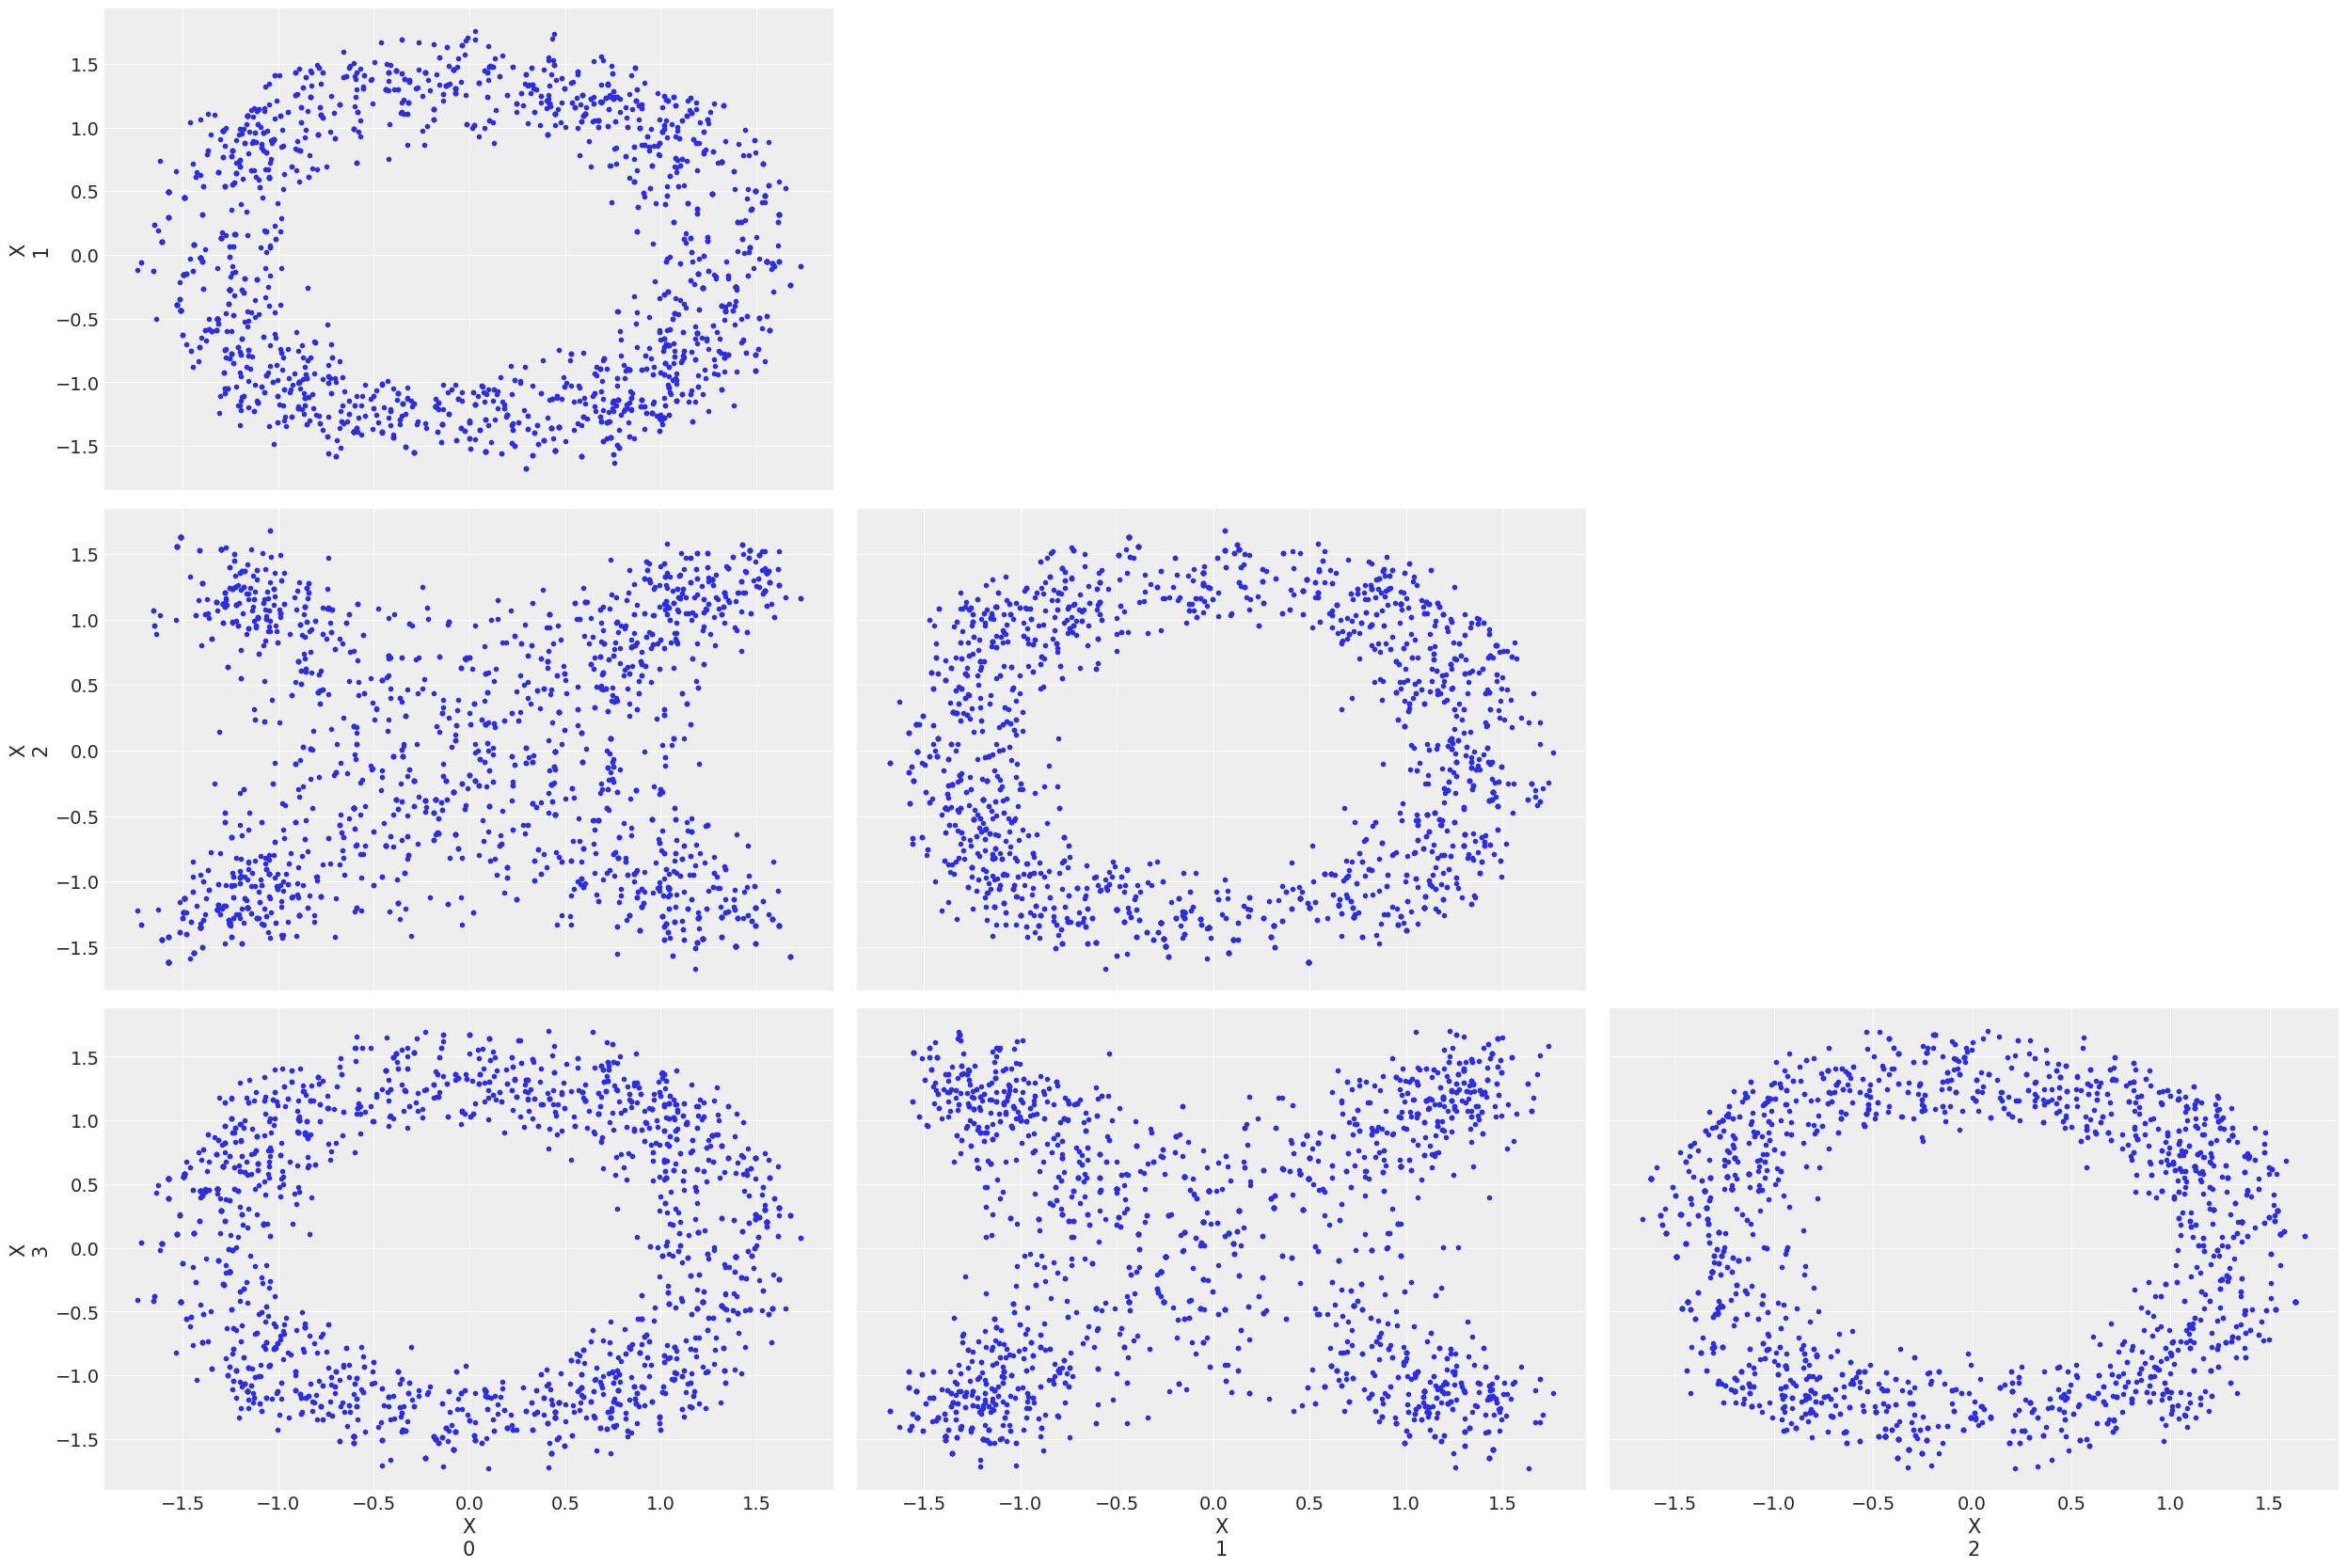

<Figure size 720x480 with 0 Axes>

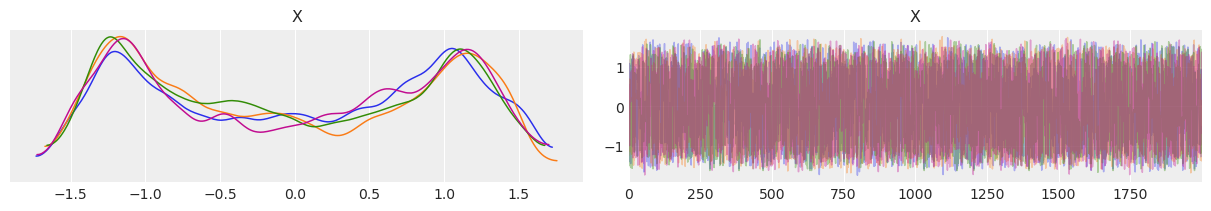

In [11]:
plt.figure()
az.plot_pair(az_ring_trace)
plt.show()

plt.figure()
az.plot_trace(az_ring_trace)
plt.show()

In [12]:
with ring_model:
    ring_trace = pm.sample_nfmc(2000, init_method='map+laplace', local_thresh=3, local_step_size=1.0, 
                                local_grad=True, init_local=True, full_local=False, nf_local_iter=10,
                                nf_iter=40, chains=1,  frac_validate=0.2, alpha=(0,0), parallel=False,
                                NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True, iteration=5)
    az_ring_trace = az.from_pymc3(ring_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Using map+laplace to initialize.



[0.40546511 0.40546511 0.40546511 0.40546511]
Number of points we perform additional local exploration around = 14
Using local exploration to improve the SINF initialization for 10 iterations.
Number of points we perform additional local exploration around = 79
Number of points we perform additional local exploration around = 106
Number of points we perform additional local exploration around = 107
Number of points we perform additional local exploration around = 131
Number of points we perform additional local exploration around = 199
Number of points we perform additional local exploration around = 187
Number of points we perform additional local exploration around = 202
Number of points we perform additional local exploration around = 214
Number of points we perform additional local exploration around = 198
Number of points we perform additional local exploration around = 206


Stage:   1, Normalizing Constant Estimate: 0.0011787117008169815
INFO:pymc3:Stage:   1, Normalizing Constant Estimate: 0.0011787117008169815


Re-initializing SINF fits using samples from latest iteration after local exploration.
No longer using local exploration after warmup iterations.


Stage:   2, Normalizing Constant Estimate: 0.0011723227767160872
INFO:pymc3:Stage:   2, Normalizing Constant Estimate: 0.0011723227767160872
Stage:   3, Normalizing Constant Estimate: 0.0011566786026281132
INFO:pymc3:Stage:   3, Normalizing Constant Estimate: 0.0011566786026281132
Stage:   4, Normalizing Constant Estimate: 0.0012411689982600085
INFO:pymc3:Stage:   4, Normalizing Constant Estimate: 0.0012411689982600085
Stage:   5, Normalizing Constant Estimate: 0.001153278815989409
INFO:pymc3:Stage:   5, Normalizing Constant Estimate: 0.001153278815989409
Stage:   6, Normalizing Constant Estimate: 0.0011921689960796796
INFO:pymc3:Stage:   6, Normalizing Constant Estimate: 0.0011921689960796796
Stage:   7, Normalizing Constant Estimate: 0.0011577690770938496
INFO:pymc3:Stage:   7, Normalizing Constant Estimate: 0.0011577690770938496


Stage:   8, Normalizing Constant Estimate: 0.0011610004878340483
Normalizing constant estimate has stabilised - ending NF fits.


<Figure size 720x480 with 0 Axes>

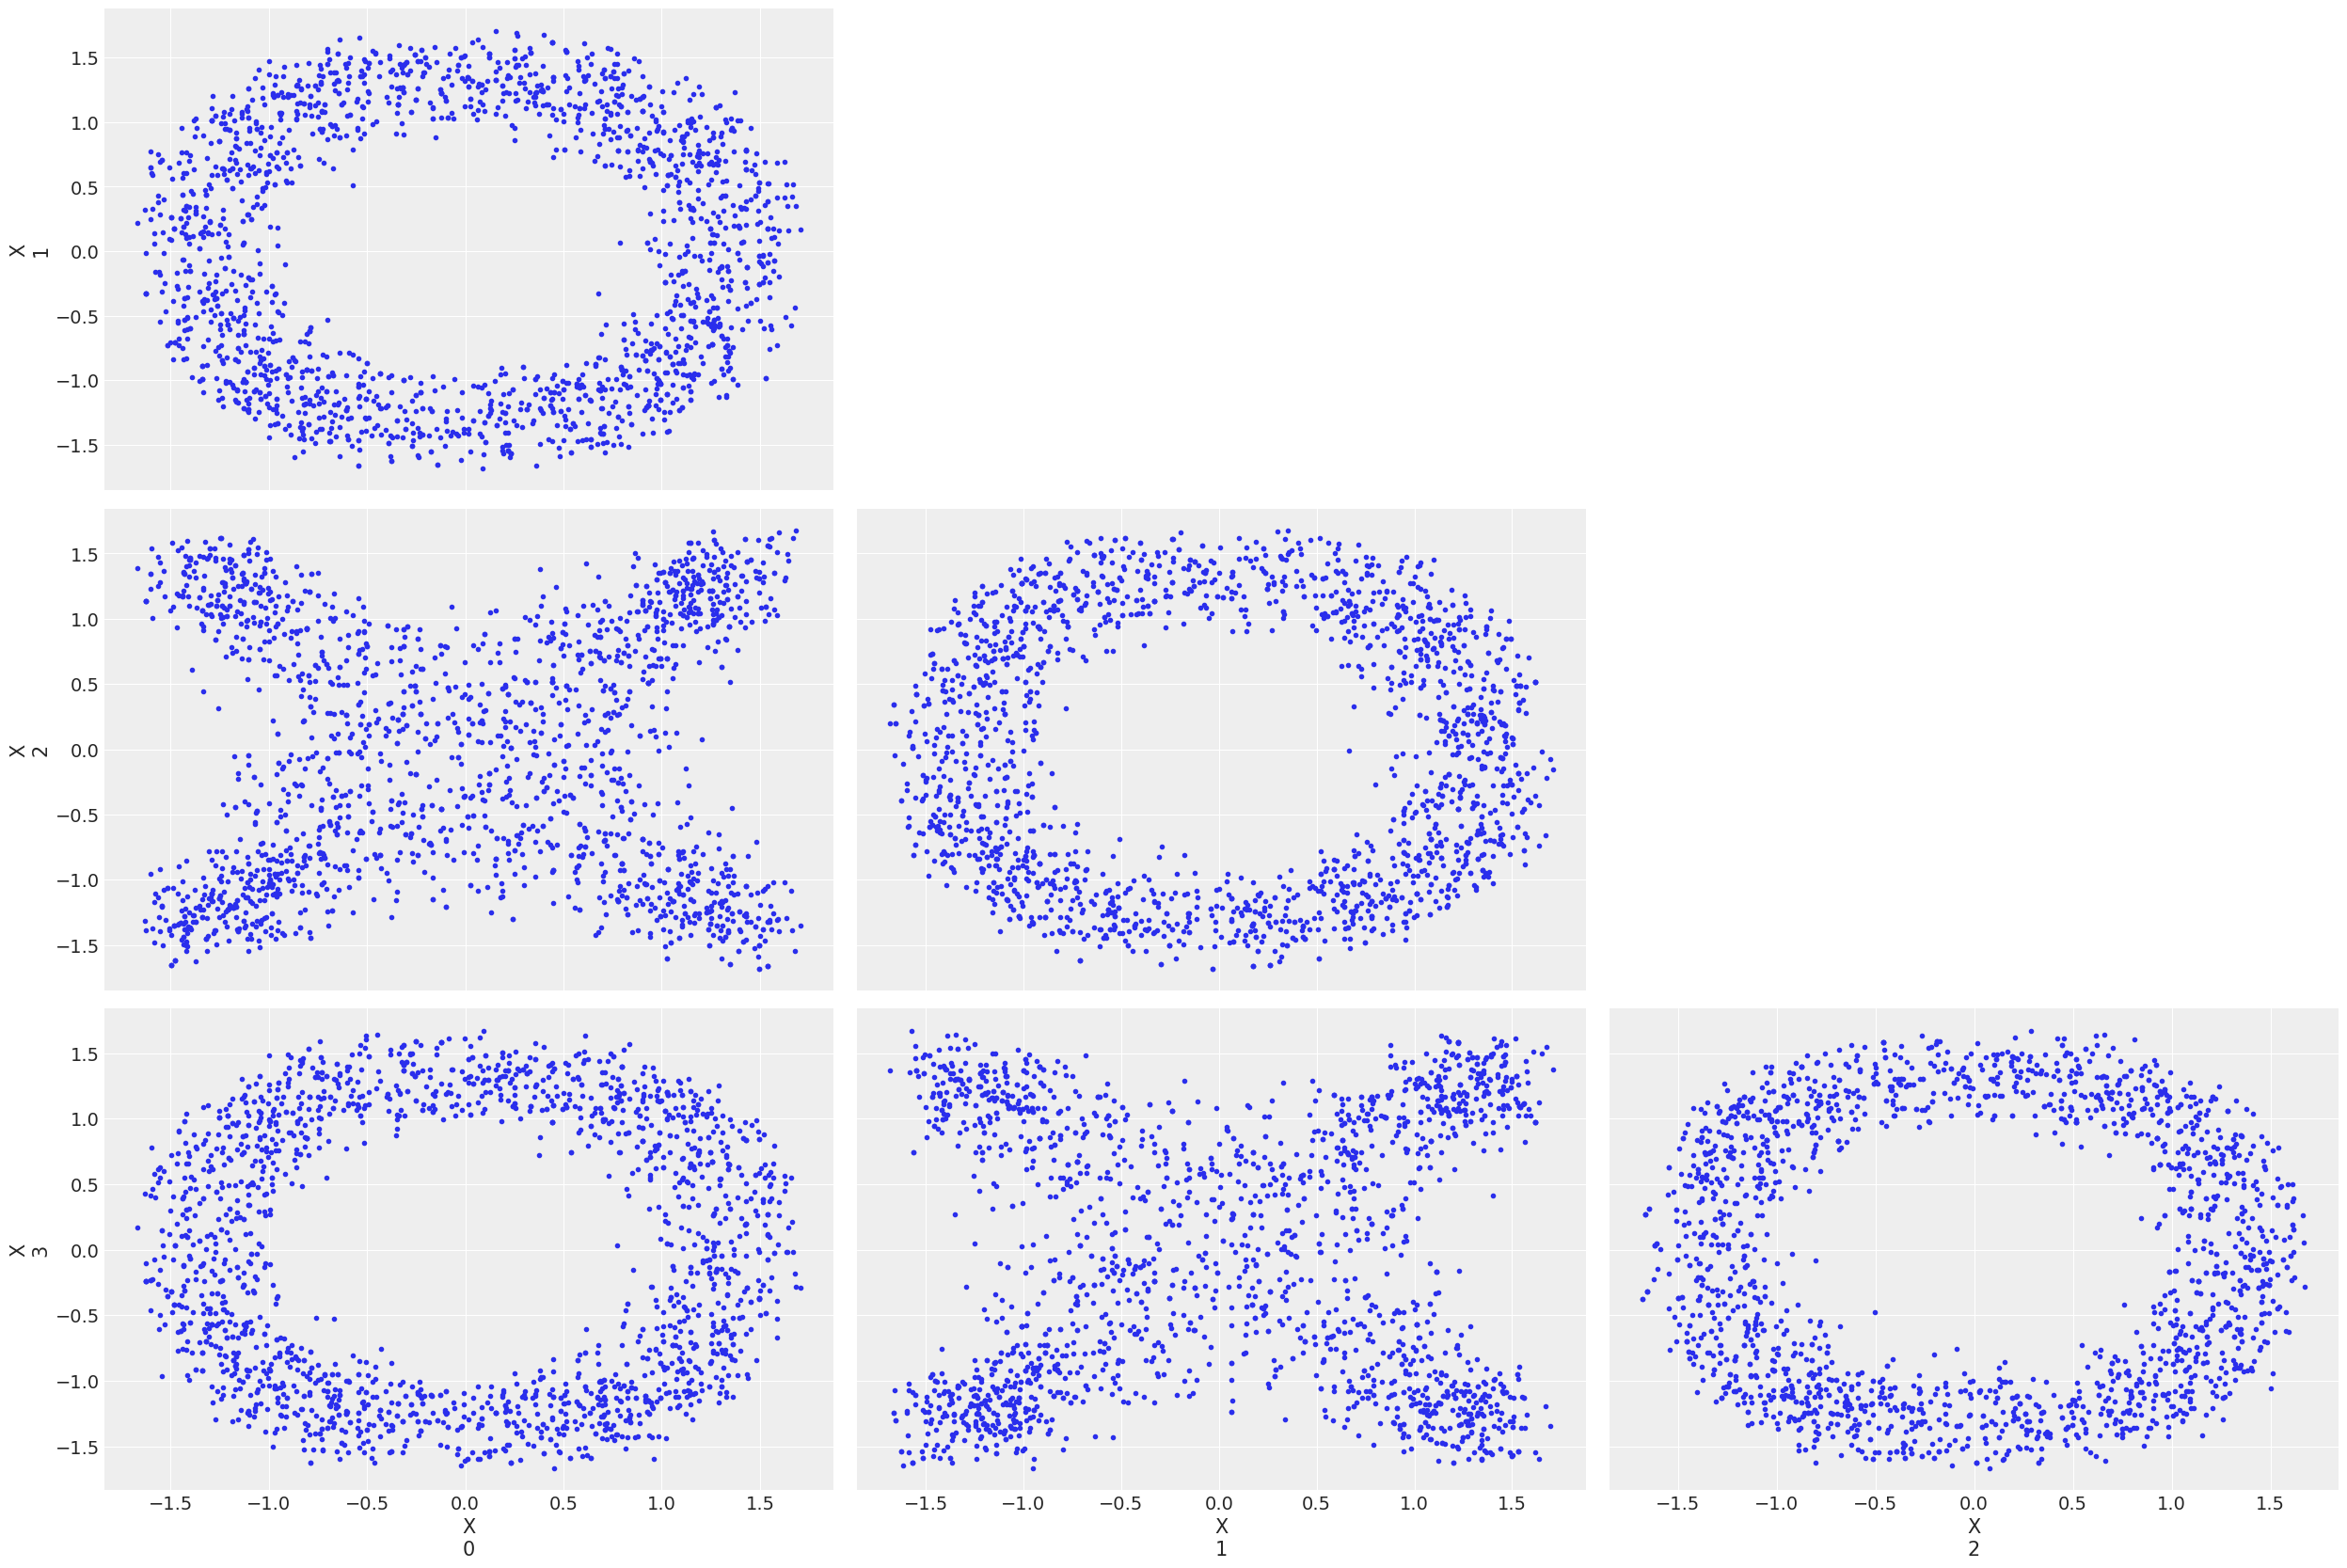

<Figure size 720x480 with 0 Axes>

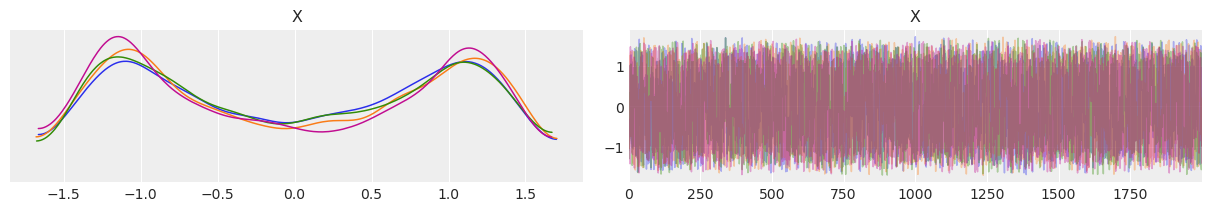

In [13]:
plt.figure()
az.plot_pair(az_ring_trace)
plt.show()

plt.figure()
az.plot_trace(az_ring_trace)
plt.show()

Hierarchical Radon Model ....

In [36]:
data = pd.read_csv(pm.get_data("radon.csv"))
data["log_radon"] = data["log_radon"].astype(theano.config.floatX)
county_names = data.county.unique()
county_idx = data.county_code.values

n_counties = len(data.county.unique())

In [37]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal("mu_a", mu=0.0, sigma=100)
    sigma_a = pm.HalfNormal("sigma_a", 5.0)
    mu_b = pm.Normal("mu_b", mu=0.0, sigma=100)
    sigma_b = pm.HalfNormal("sigma_b", 5.0)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal("a", mu=mu_a, sigma=sigma_a, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal("b", mu=mu_b, sigma=sigma_b, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy("eps", 5.0)

    radon_est = a[county_idx] + b[county_idx] * data.floor.values

    # Data likelihood
    radon_like = pm.Normal("radon_like", mu=radon_est, sigma=eps, observed=data.log_radon)

First, let's sample the posterior using NUTS.

In [38]:
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=2000, target_accept=0.9)
    hierarchical_az_trace = az.from_pymc3(hierarchical_trace)

/home/richard/pymc3_dev/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [eps, b, a, sigma_b, mu_b, sigma_a, mu_a]
INFO:pymc3:NUTS: [eps, b, a, sigma_b, mu_b, sigma_a, mu_a]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
INFO:pymc3:Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


<Figure size 720x480 with 0 Axes>

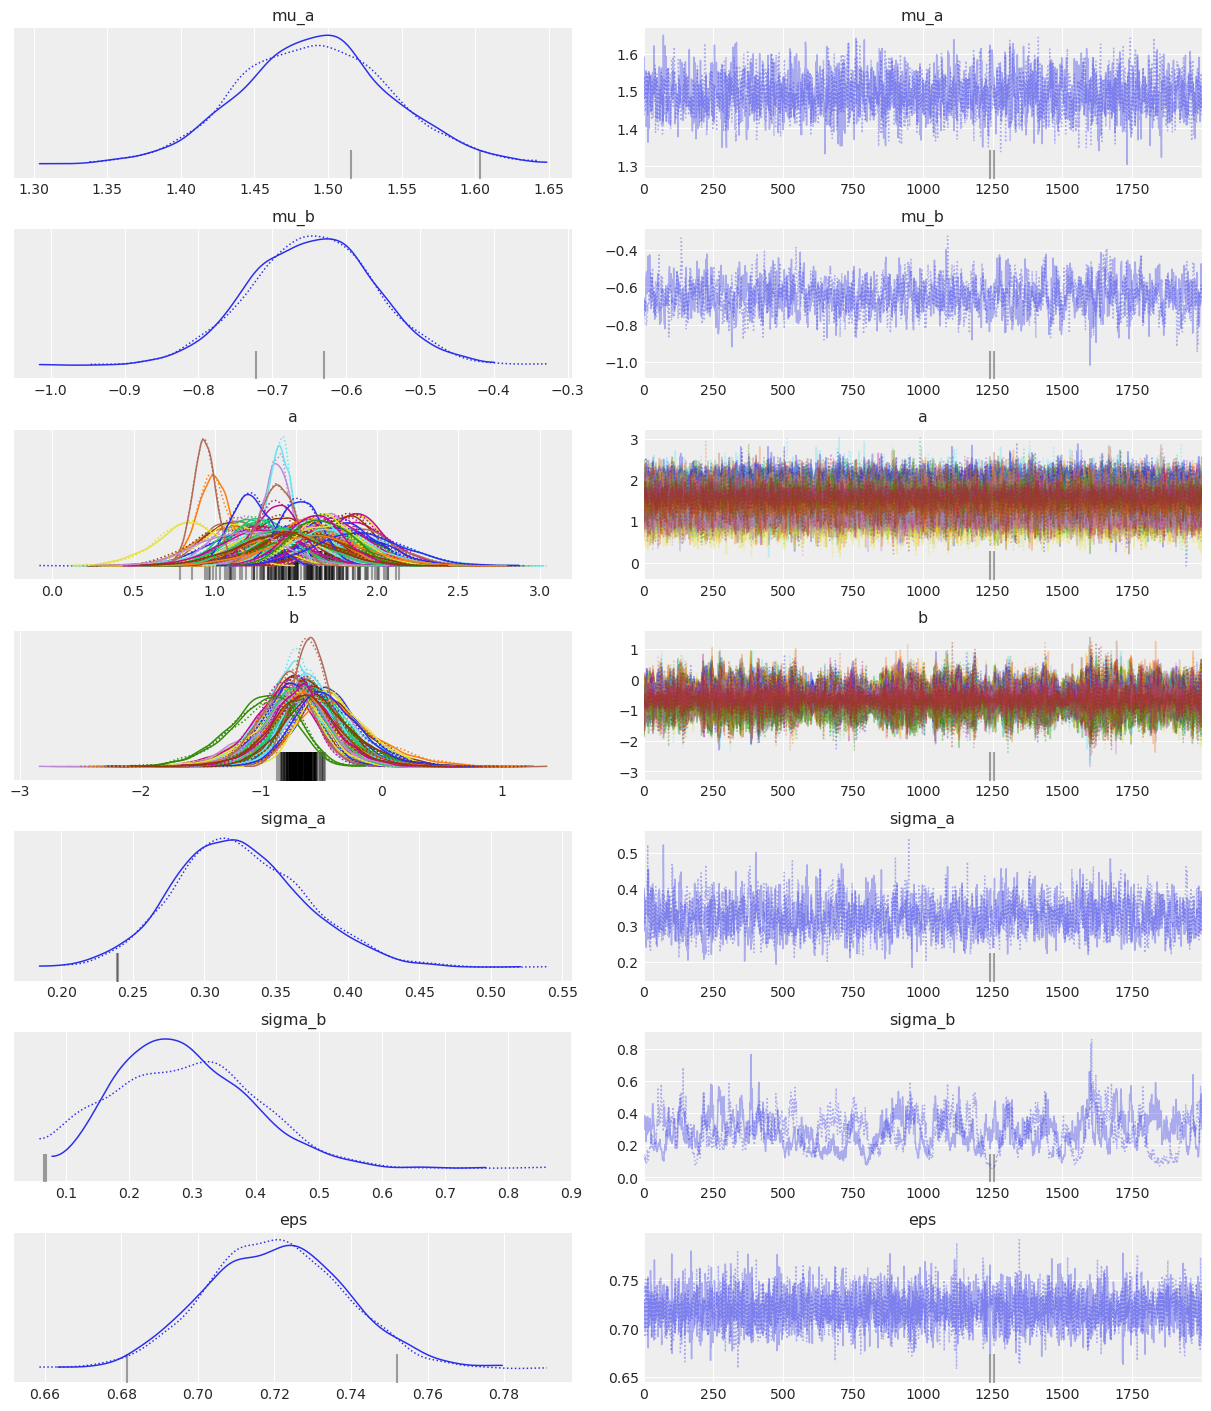

In [39]:
plt.figure()
ax = az.plot_trace(hierarchical_az_trace)
plt.show()

Now let's look at using NFMC.

In [44]:
map_sol, scipy_opt = pm.find_MAP(model=hierarchical_model, method='L-BFGS-B', return_raw=True)
print(map_sol)
print(scipy_opt)


{'mu_a': array(219.12137475), 'sigma_a_log__': array(188.55619832), 'mu_b': array(-21187817.48731007), 'sigma_b_log__': array(-98.98151677), 'a': array([-5.41154551e-01, -3.65471574e+01,  6.70745720e-02, -1.54014379e+00,
        6.31938136e-02,  6.14096974e-01, -9.16532952e+00,  4.08229571e-01,
       -3.64023903e+00, -9.39663421e-01, -7.91432903e-02,  6.30351991e-01,
       -9.11906182e-01, -8.95231288e+00, -2.68987626e-01,  7.24762289e-02,
       -6.31226581e-01, -5.36343181e+00, -3.29785386e+01,  8.80417264e-01,
       -2.68178586e+00, -1.40496637e+00,  2.70098146e-01, -2.62259185e+00,
       -9.04303270e+00,  2.08681519e+02, -5.37783056e-01, -8.52165368e-01,
        1.90032143e-01, -4.39167142e+00,  5.77605153e-01,  1.13103601e-01,
        9.70220205e-01,  1.27933313e-01, -2.18620431e+00,  1.41187203e+00,
       -3.09061406e+00,  2.83884316e-01,  7.38085464e-02,  9.85690874e-01,
       -1.64785066e+00,  5.20562909e-01, -3.06307258e+00, -1.60449378e+00,
       -6.56710399e+00, -2.7

In [42]:
with hierarchical_model:
    hierarchical_nf_trace = pm.sample_nfmc(500, init_method='full_rank', local_thresh=4, local_step_size=1.0, 
                                    local_grad=True, init_local=True, full_local=False, nf_local_iter=0,
                                    nf_iter=40, chains=1,  frac_validate=0.2, alpha=(0,0), parallel=False,
                                    NBfirstlayer=True, bw_factor=2.0, k_trunc=0.5, pareto=True, iteration=5)
    hierarchical_az_nf_trace = az.from_pymc3(hierarchical_nf_trace)

Initializing normalizing flow based sampling...
INFO:pymc3:Initializing normalizing flow based sampling...
Sampling 1 chain Cores available for optimization: 0
INFO:pymc3:Sampling 1 chain Cores available for optimization: 0


Initializing with full-rank EL2O approx family.



(7,)


/home/richard/pymc3_dev/pymc3/nfmc/nfmc.py:369: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.mu_map = np.array(self.mu_map).squeeze()


TypeError: expected type_num 12 (NPY_FLOAT64) got 17
Apply node that caused the error: Elemwise{exp,no_inplace}(Subtensor{int64}.0)
Toposort index: 29
Inputs types: [TensorType(float64, scalar)]
Inputs shapes: [()]
Inputs strides: [()]
Inputs values: [array(array(635.38577041), dtype=object)]
Outputs clients: [[Elemwise{Composite{Cast{int8}(GE(i0, i1))}}(eps0123456, TensorConstant{0}), Elemwise{mul,no_inplace}(TensorConstant{0.2}, eps0123456), for{cpu,scan_fn&scan_fn&scan_fn&scan_fn&scan_fn&scan_fn&scan_fn}(TensorConstant{175}, TensorConstant{[  0   1  ..2 173 174]}, TensorConstant{175}, TensorConstant{175}, TensorConstant{175}, TensorConstant{175}, TensorConstant{175}, TensorConstant{175}, TensorConstant{175}, eps0123456, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{Cast{int8}(GE(i0, i1))}}.0, __logp_eps_log__0123456, sigma_b0123456, Elemwise{sqr,no_inplace}.0, sigma_a0123456, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{Cast{int8}(GE(i0, i1))}}.0, __logp_sigma_b_log__0123456, __logp_mu_b0123456, Elemwise{Composite{Cast{int8}(GE(i0, i1))}}.0, __logp_sigma_a_log__0123456, __logp_mu_a0123456, Elemwise{sub,no_inplace}.0, Subtensor{int64}.0, Elemwise{sub,no_inplace}.0, Subtensor{int64}.0, Elemwise{Composite{(i0 - (i1 + (i2 * i3)))}}[(0, 1)].0, Elemwise{mul,no_inplace}.0, Elemwise{Add}[(0, 1)].0, Elemwise{sqr,no_inplace}.0)]]

Backtrace when the node is created(use Theano flag traceback__limit=N to make it longer):
  File "/home/richard/anaconda3/envs/pymc3_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3155, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/richard/anaconda3/envs/pymc3_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3347, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/richard/anaconda3/envs/pymc3_dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-7af10e087805>", line 17, in <module>
    eps = pm.HalfCauchy("eps", 5.0)
  File "/home/richard/pymc3_dev/pymc3/distributions/distribution.py", line 122, in __new__
    return model.Var(name, dist, data, total_size, dims=dims)
  File "/home/richard/pymc3_dev/pymc3/model.py", line 1141, in Var
    var = TransformedRV(
  File "/home/richard/pymc3_dev/pymc3/model.py", line 2015, in __init__
    normalRV = transform.backward(self.transformed)
  File "/home/richard/pymc3_dev/pymc3/distributions/transforms.py", line 215, in backward
    return tt.exp(x)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.